# Visualisation
In this tutorial, we explore how to use the various functions in the visualisation module of LEGWORK. The visualisation module is designed to make it quick and easy to plot various distributions of a collection of gravitational wave sources as well as show them on the LISA sensitivity curve.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'retina'

## Setup
First we need to import `legwork` and some other standard stuff.

In [3]:
import legwork.visualisation as vis
from legwork import source, psd

import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

In [4]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.7 * fs,
          'ytick.labelsize': 0.7 * fs}
plt.rcParams.update(params)

## Plotting parameter distributions
To start, we can explore how we can use the module to investigate distributions of parameters.

### 1D distributions

In [5]:
# create a random normal variable
x = np.random.normal(size=10000)

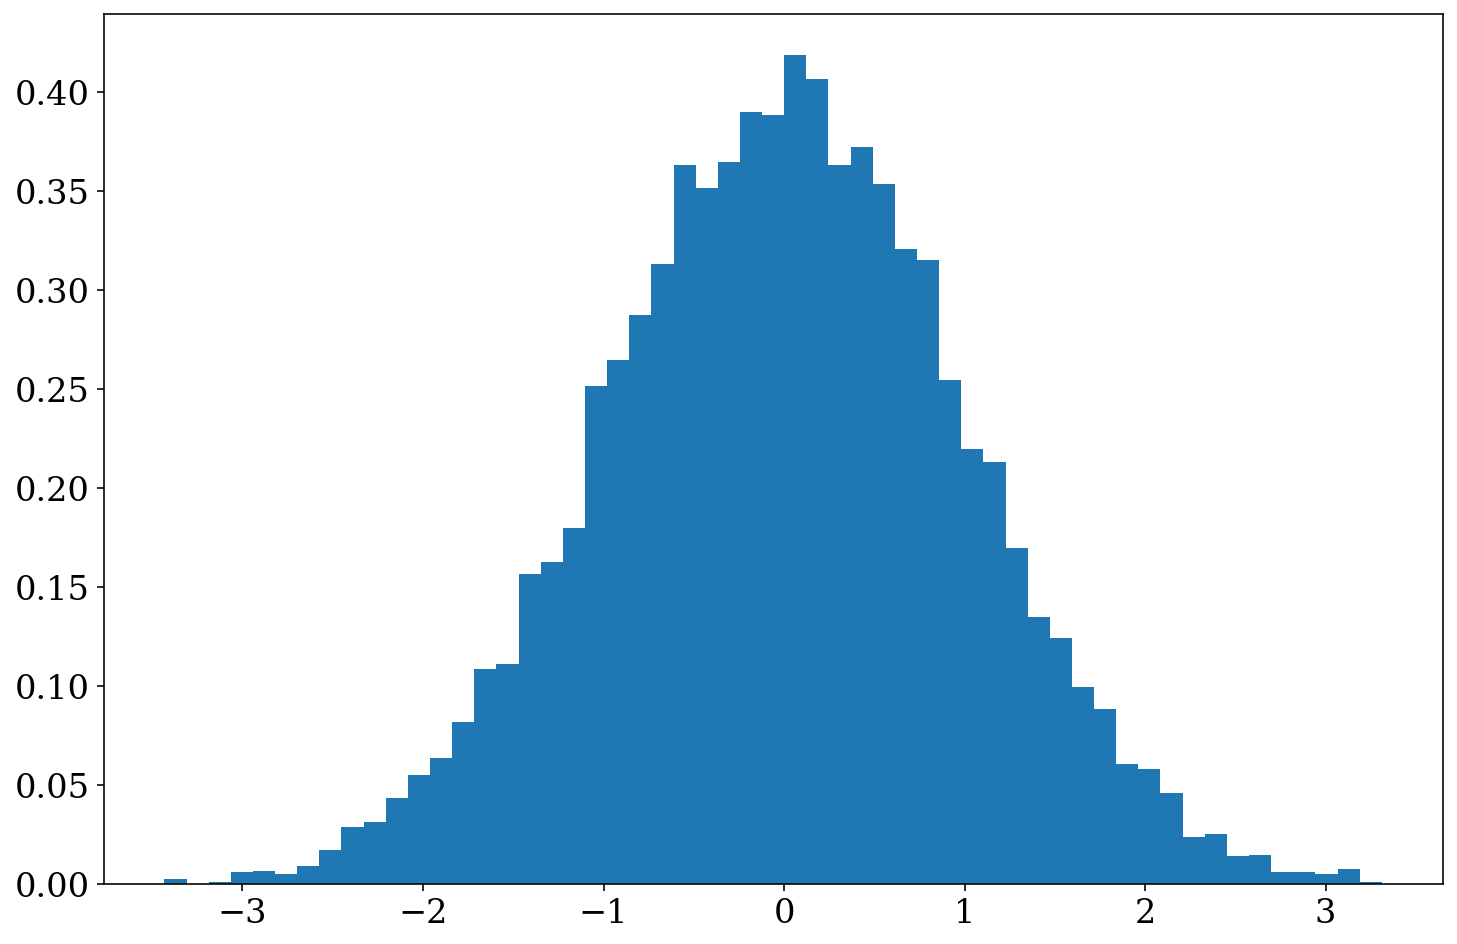

In [6]:
# plot with all of the default settings
fig, ax = vis.plot_1D_dist(x)

Nice and simple! But this plot isn't particularly informative so we can also specify various plot parameters as part of the function. Let's add some axis labels and change the x limits to ensure symmetry.

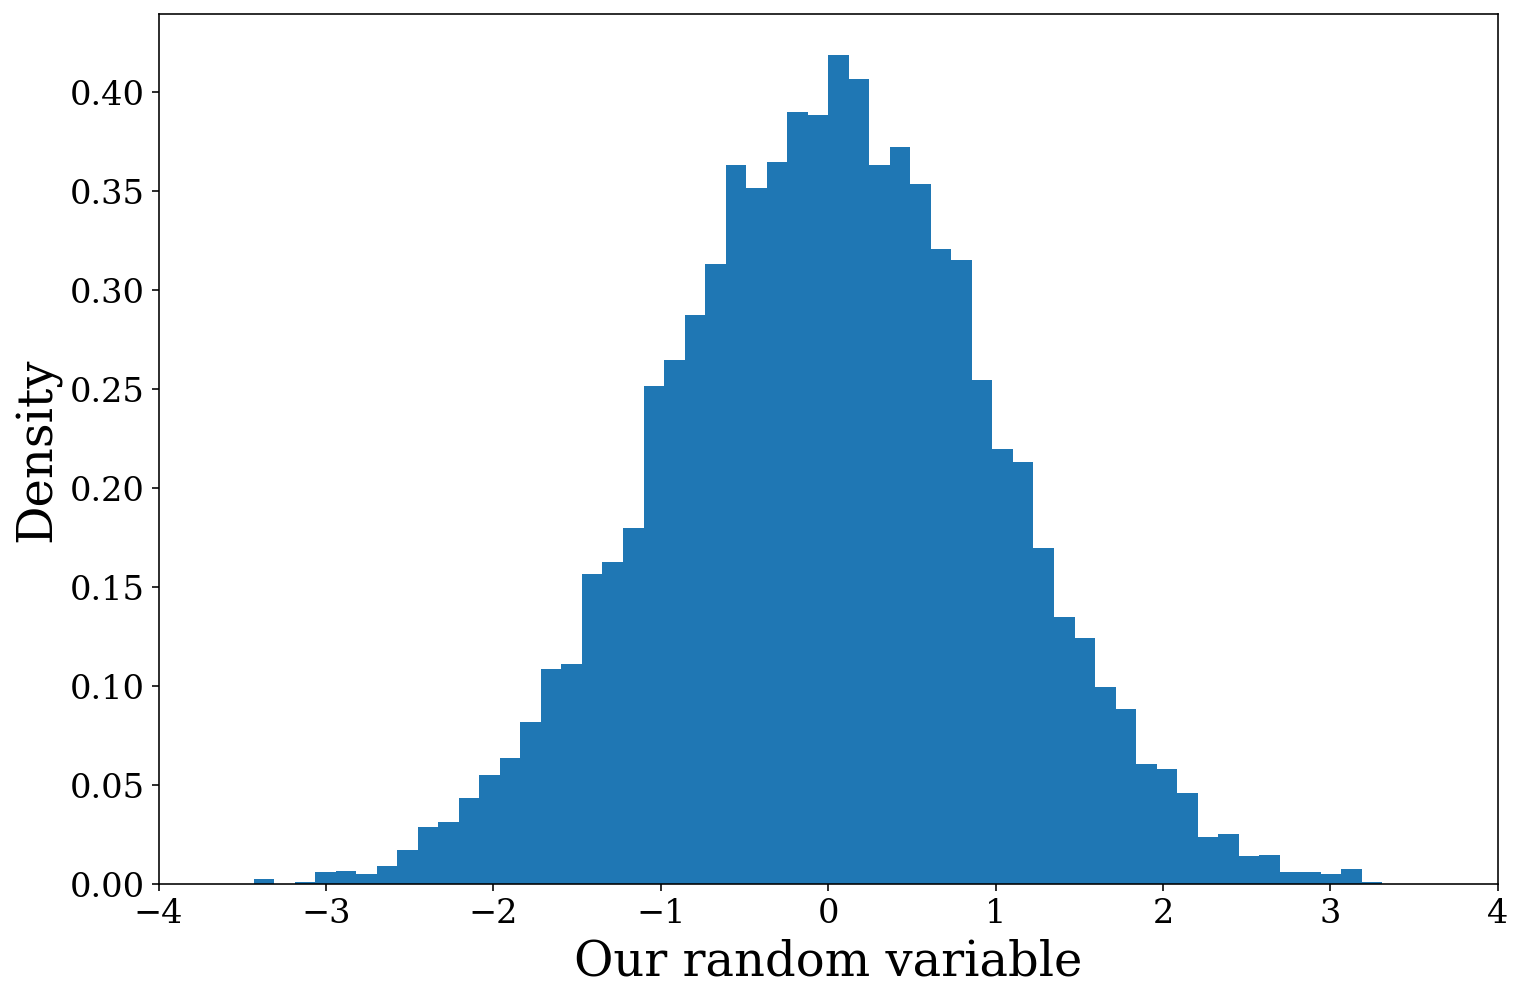

In [7]:
fig, ax = vis.plot_1D_dist(x, xlabel="Our random variable", ylabel="Density", xlim=(-4, 4))

Well that's much better! Perhaps instead of immediately showing the plot, it could be good to add some other features first. We can do this by specifying `show=False` and then using the returned figure and axis. Let's put this into practice by adding a line indicating the mean of the distribution which should be approximately 0.

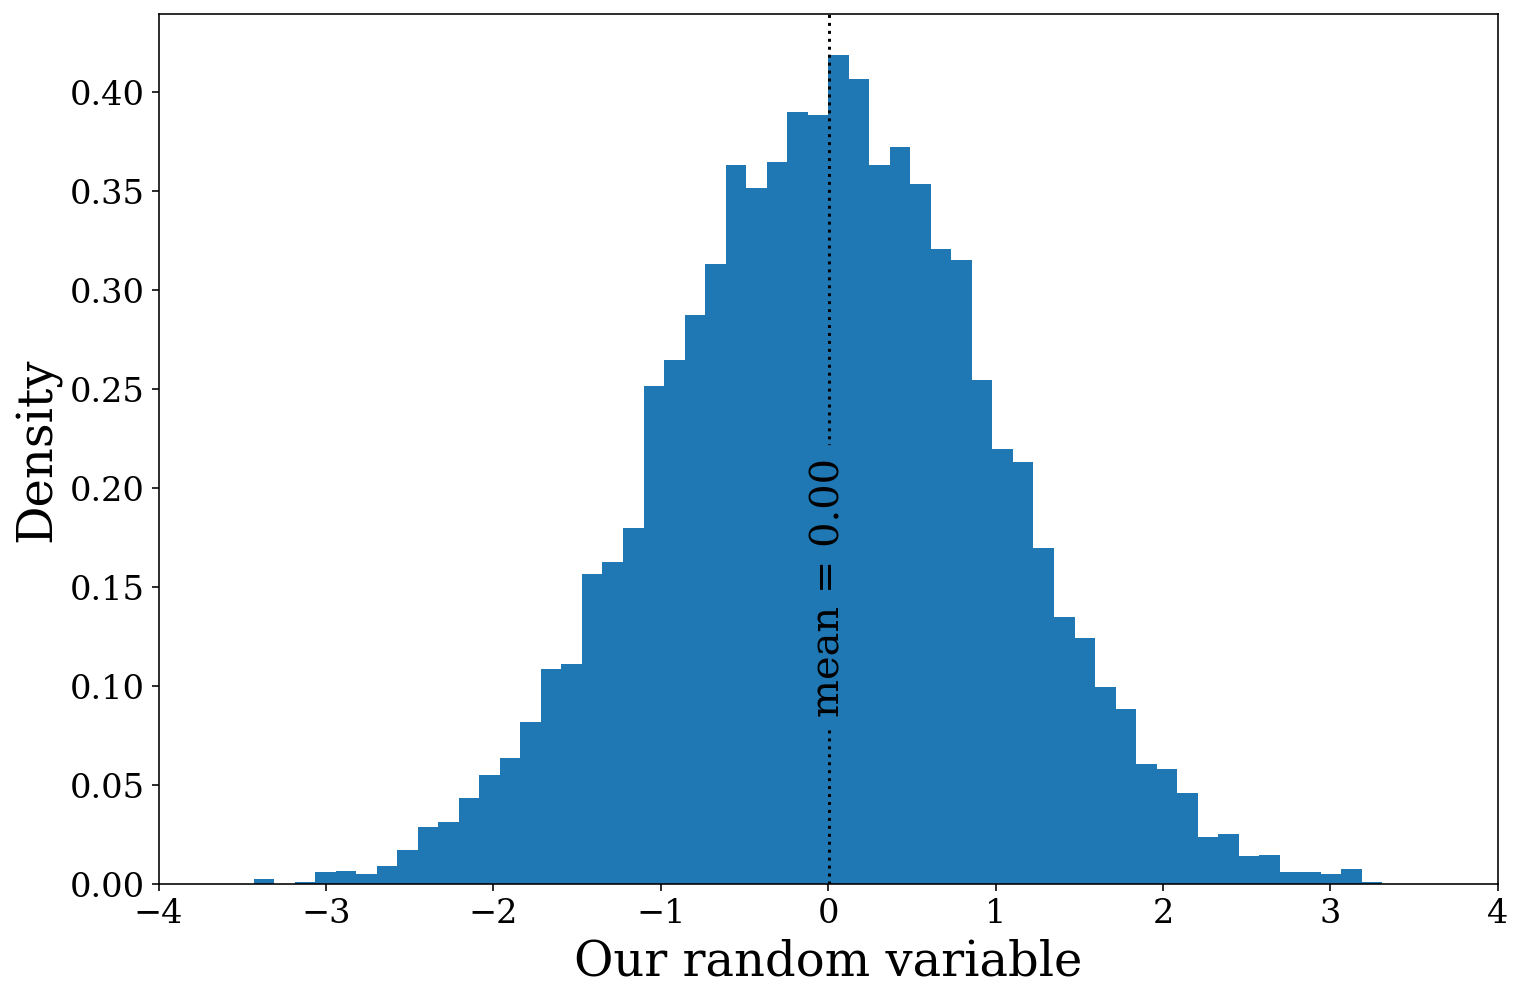

In [8]:
# create the histogram but don't show it
fig, ax = vis.plot_1D_dist(x, xlabel="Our random variable", ylabel="Density",
                           xlim=(-4, 4), show=False)

# add a line and annotation
ax.axvline(np.mean(x), linestyle="dotted", color="black")
ax.annotate("mean = {0:1.2f}".format(x.mean()), xy=(np.mean(x), 0.15),
            rotation=90, ha="center", va="center", fontsize=20,
            bbox=dict(boxstyle="round", fc="tab:blue", ec="none"))

# show the figure
plt.show()

The histogram seems to be working nicely. However, that might not be the only way you want to show the distribution. From here we can explore how we can change the distribution with various arguments. Let's add a KDE (kernel density estimator) in addition to the histogram.

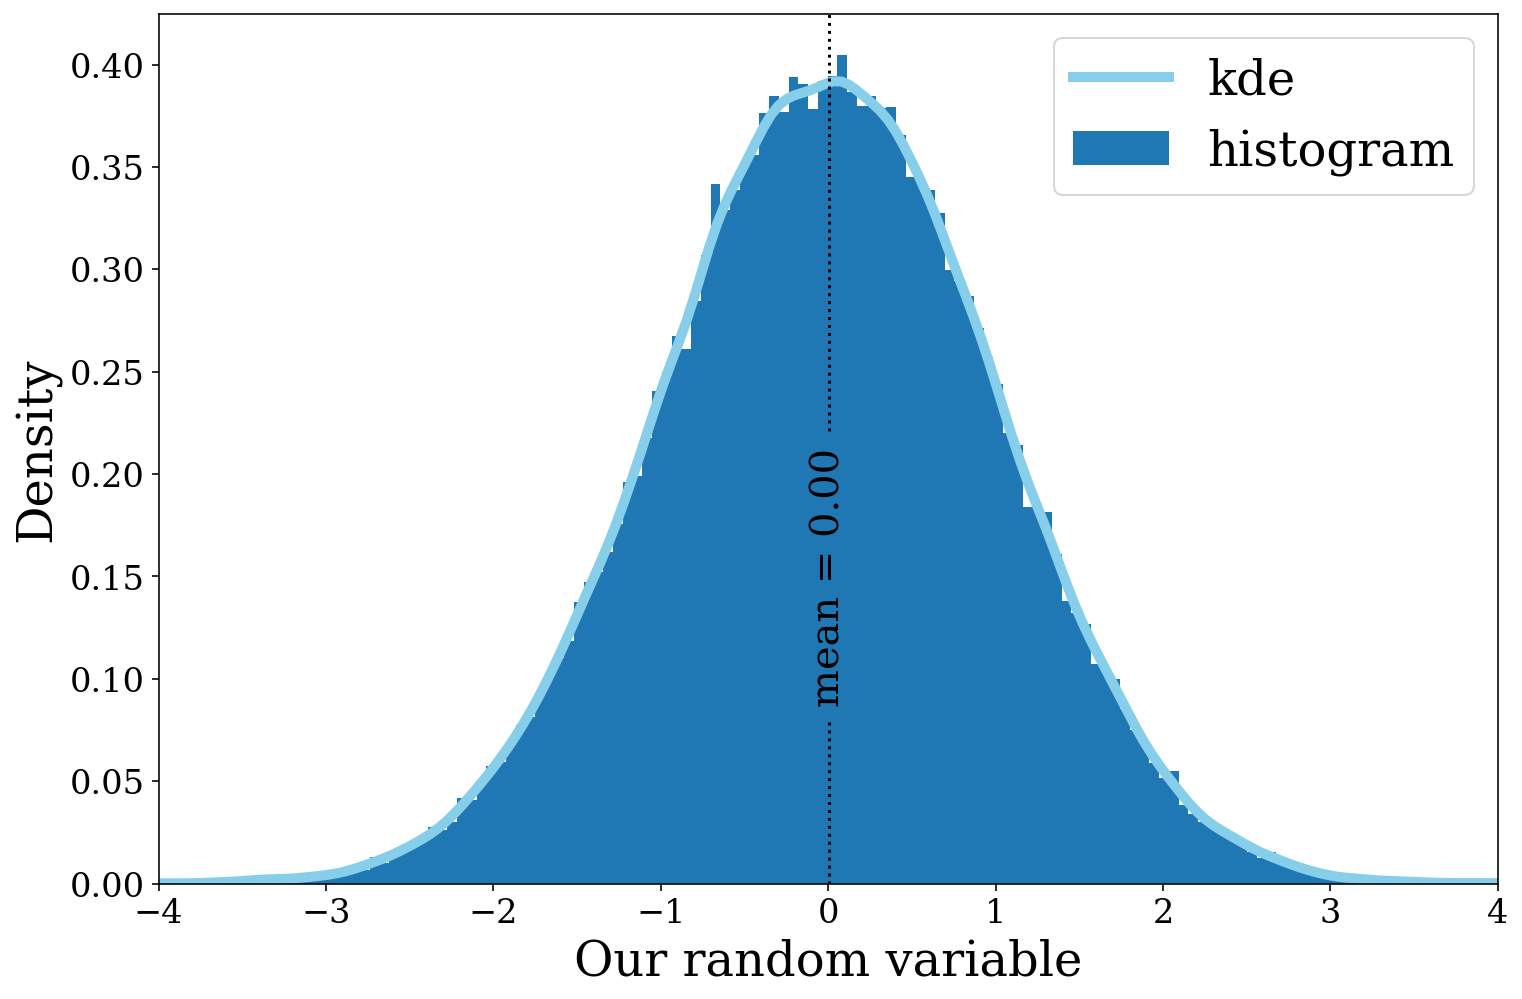

In [9]:
# create a larger sample for a smoother line
x = np.random.normal(size=100000)

# add the KDE
fig, ax = vis.plot_1D_dist(x, disttype="kde", show=False, color="skyblue", label="kde", linewidth=5)
fig, ax = vis.plot_1D_dist(x, xlabel="Our random variable", ylabel="Density", xlim=(-4, 4),
                           label="histogram", fig=fig, ax=ax, show=False)

# add a line and annotation
ax.axvline(np.mean(x), linestyle="dotted", color="black")
ax.annotate("mean = {0:1.2f}".format(x.mean()), xy=(np.mean(x), 0.15), rotation=90, ha="center", va="center",
            fontsize=20, bbox=dict(boxstyle="round", fc="tab:blue", ec="none"))

ax.legend()

# show the figure
plt.show()

**More things you can try out**

There's only so much we can show in a tutorial but this function can do much more. Here are some things you may like to try out.

- Explore the different disttypes, you can make an empirical cumulative distribution function with `disttype=ecdf`.
- Try changing the number of bins in the histogram (`bins=10`) or adjusting the bandwidth for the kde (`bw_adjust=0.5`)
- Plot things on a log scale with (`log=True` for histograms or `log_scale=(True, False)` for KDE/ECDFs)

### 2D distributions

In [10]:
# create two random normal variables
n_vals = 10000
x = np.random.normal(size=n_vals)
y = np.random.normal(size=n_vals)

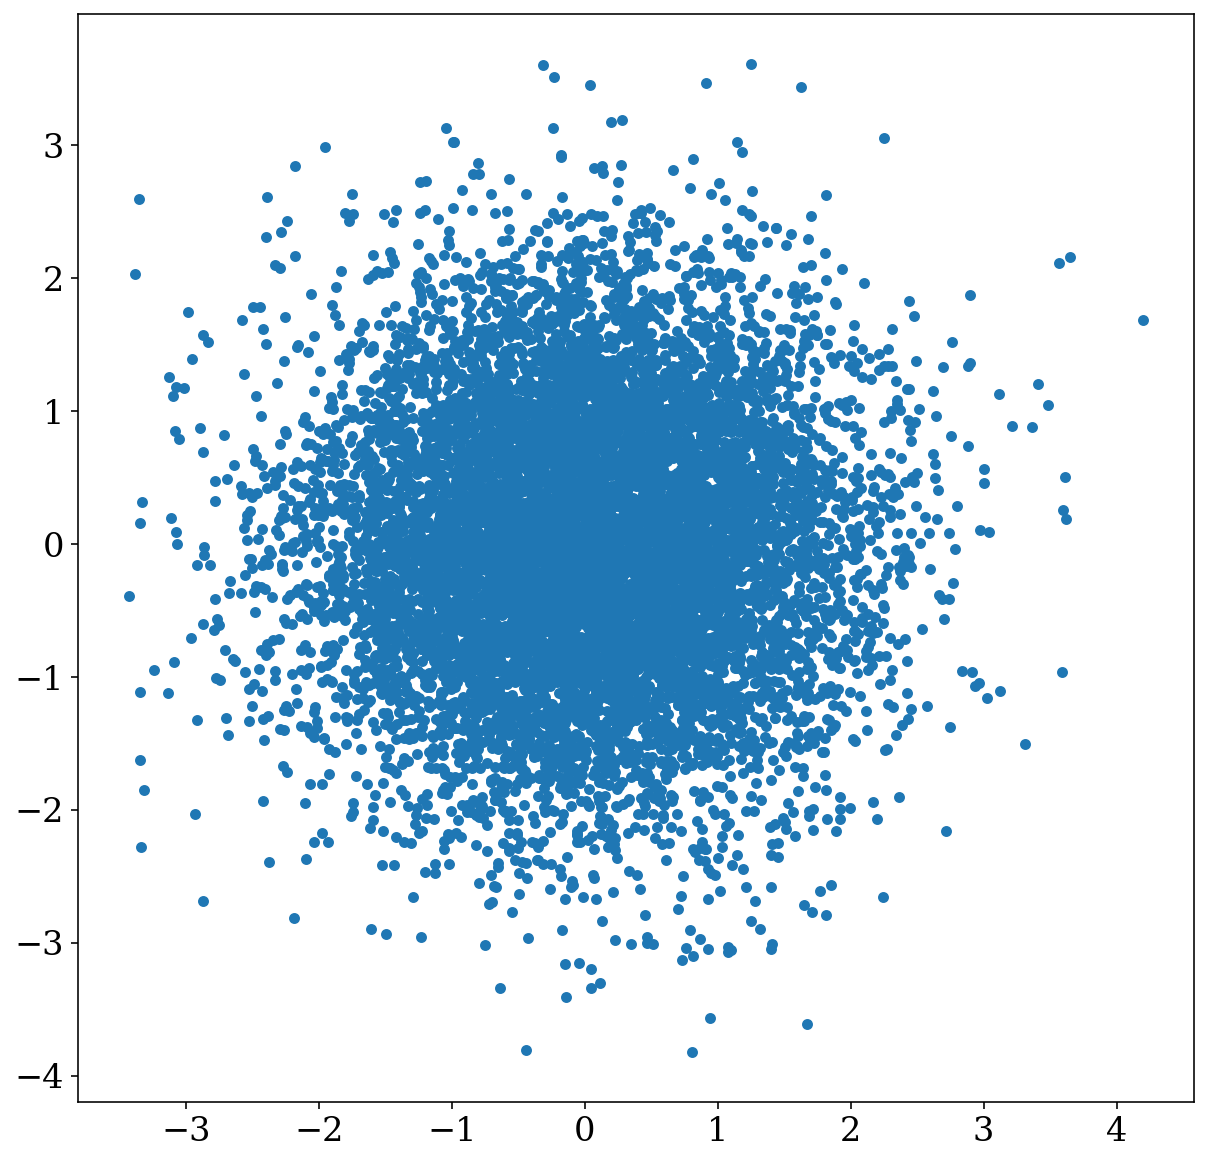

In [11]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax)

Again, we can make this much better by adding axis labels. But additionally the centre is rather oversaturated with points so it is hard to discern the distribution so let's try decreasing the point size too (to `scatter_s=0.5`).

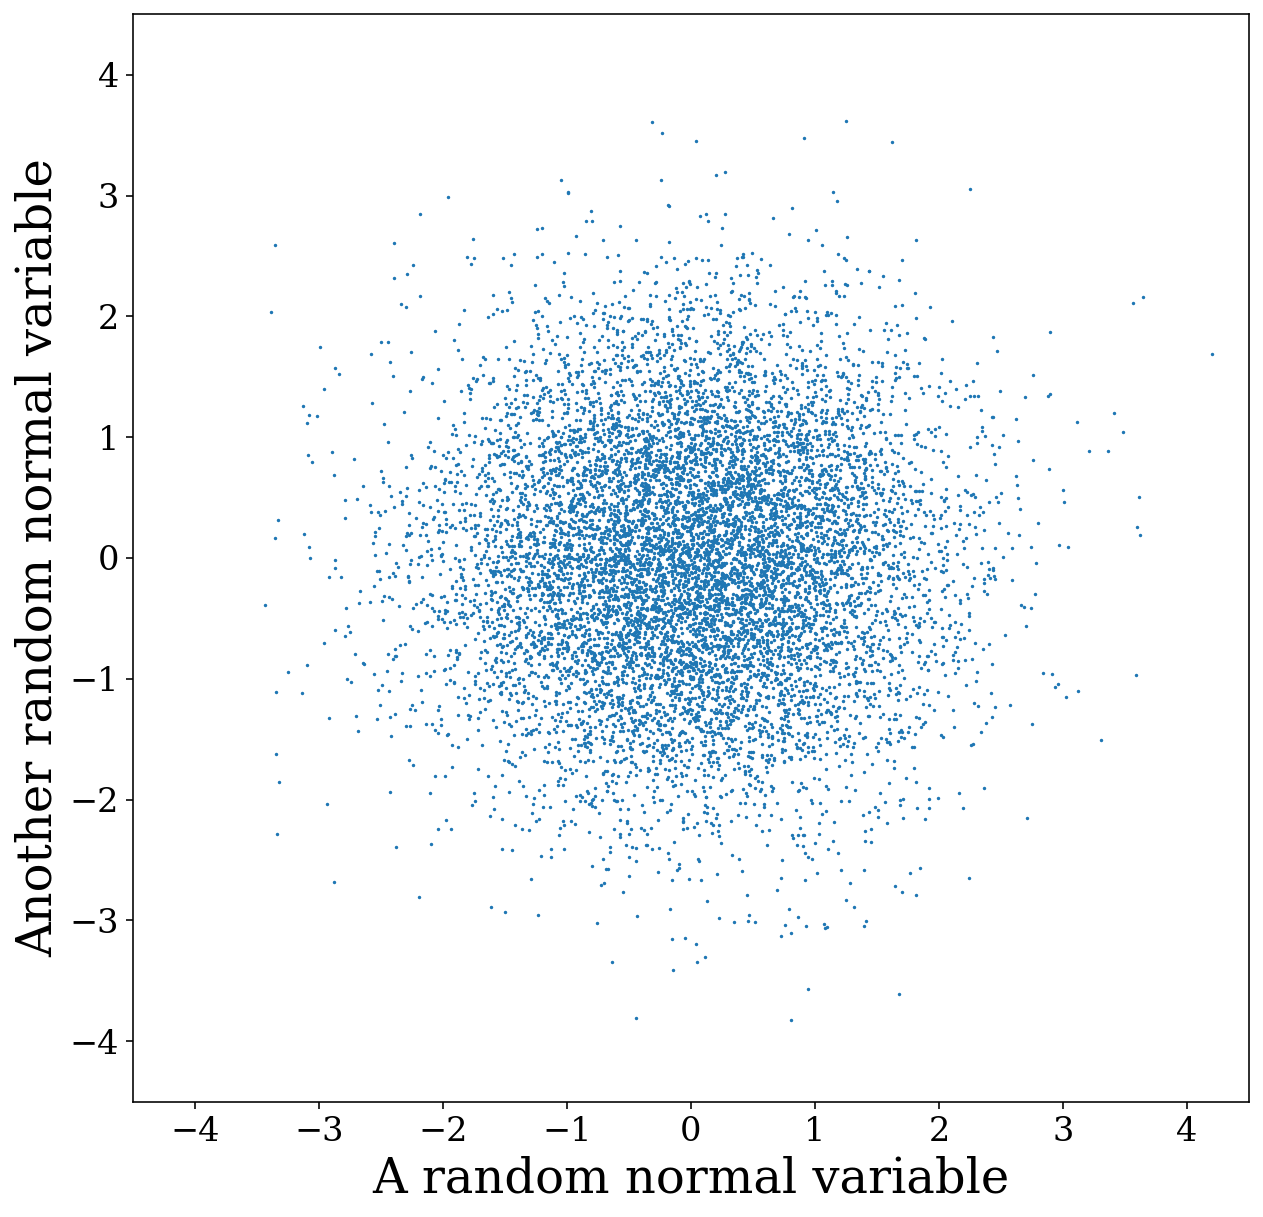

In [12]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5),
                           xlabel="A random normal variable", ylabel="Another random normal variable", scatter_s=0.5)

Well perhaps the centre is better...but now it is difficult to see the outliers! This is where the KDE density plot could really come in handy. So we can switch to `disttype=kde` instead.

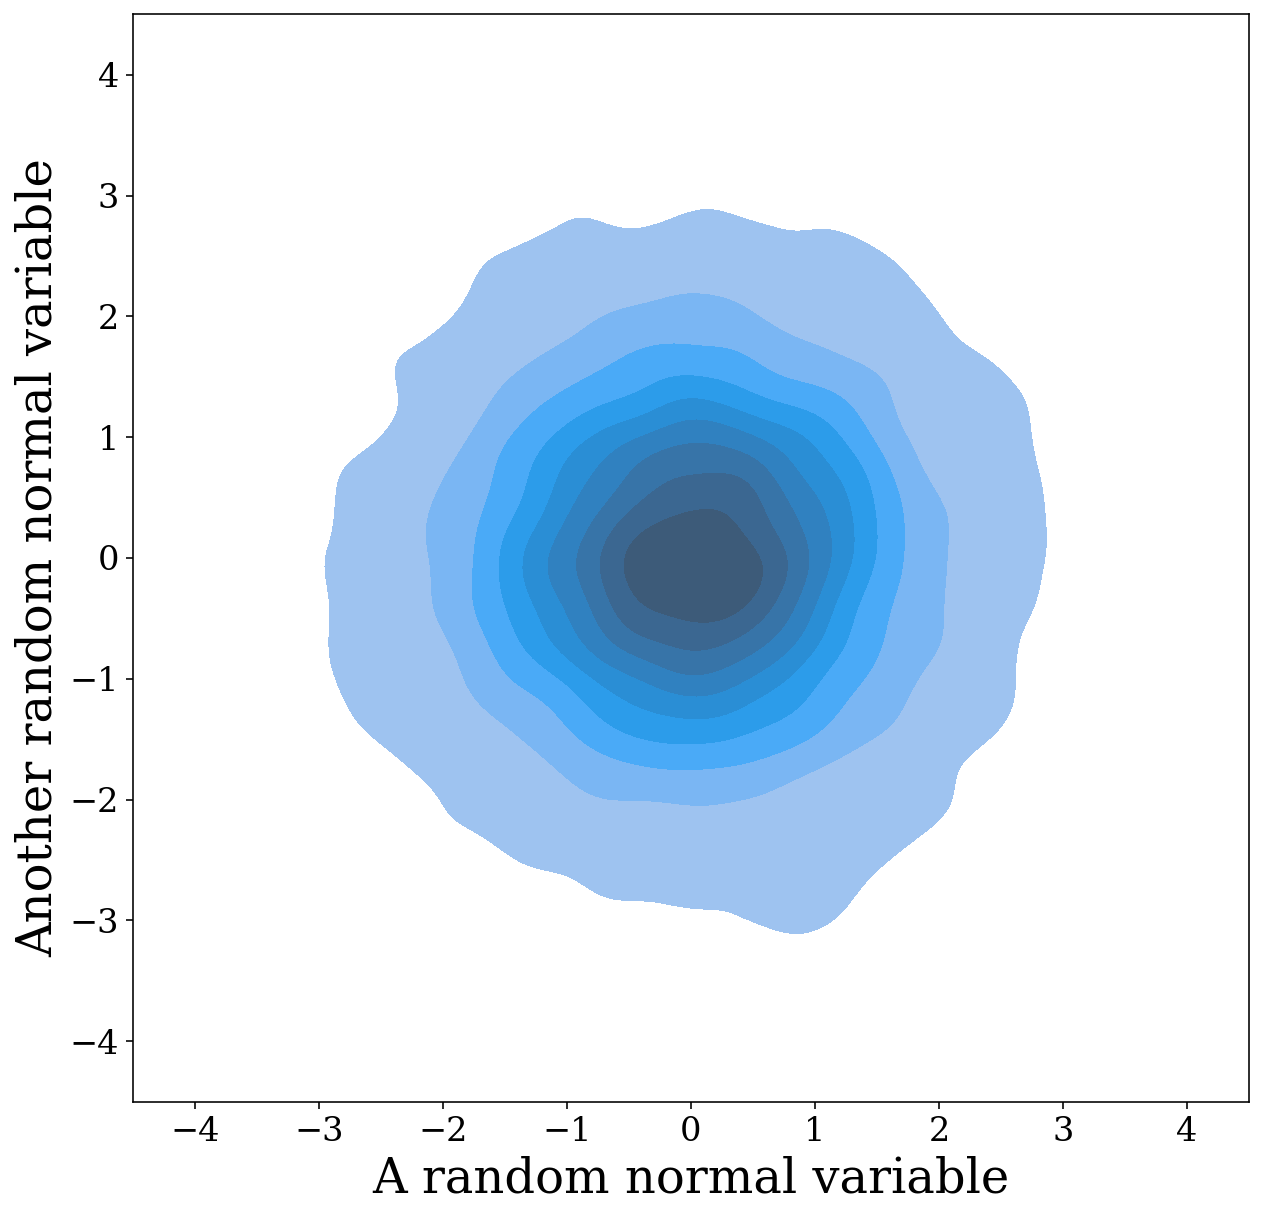

In [13]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

# add the scatter plot
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, disttype="kde", fill=True, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5),
                           xlabel="A random normal variable", ylabel="Another random normal variable")

Well that looks rather cool! However, we've added another issue...now we can't see *any* of the outliers as this density plot only goes down to the last 5% (you can adjust this with `thresh=0.01` for example)! So why don't we also add the scatter plot so the outliers are still present.

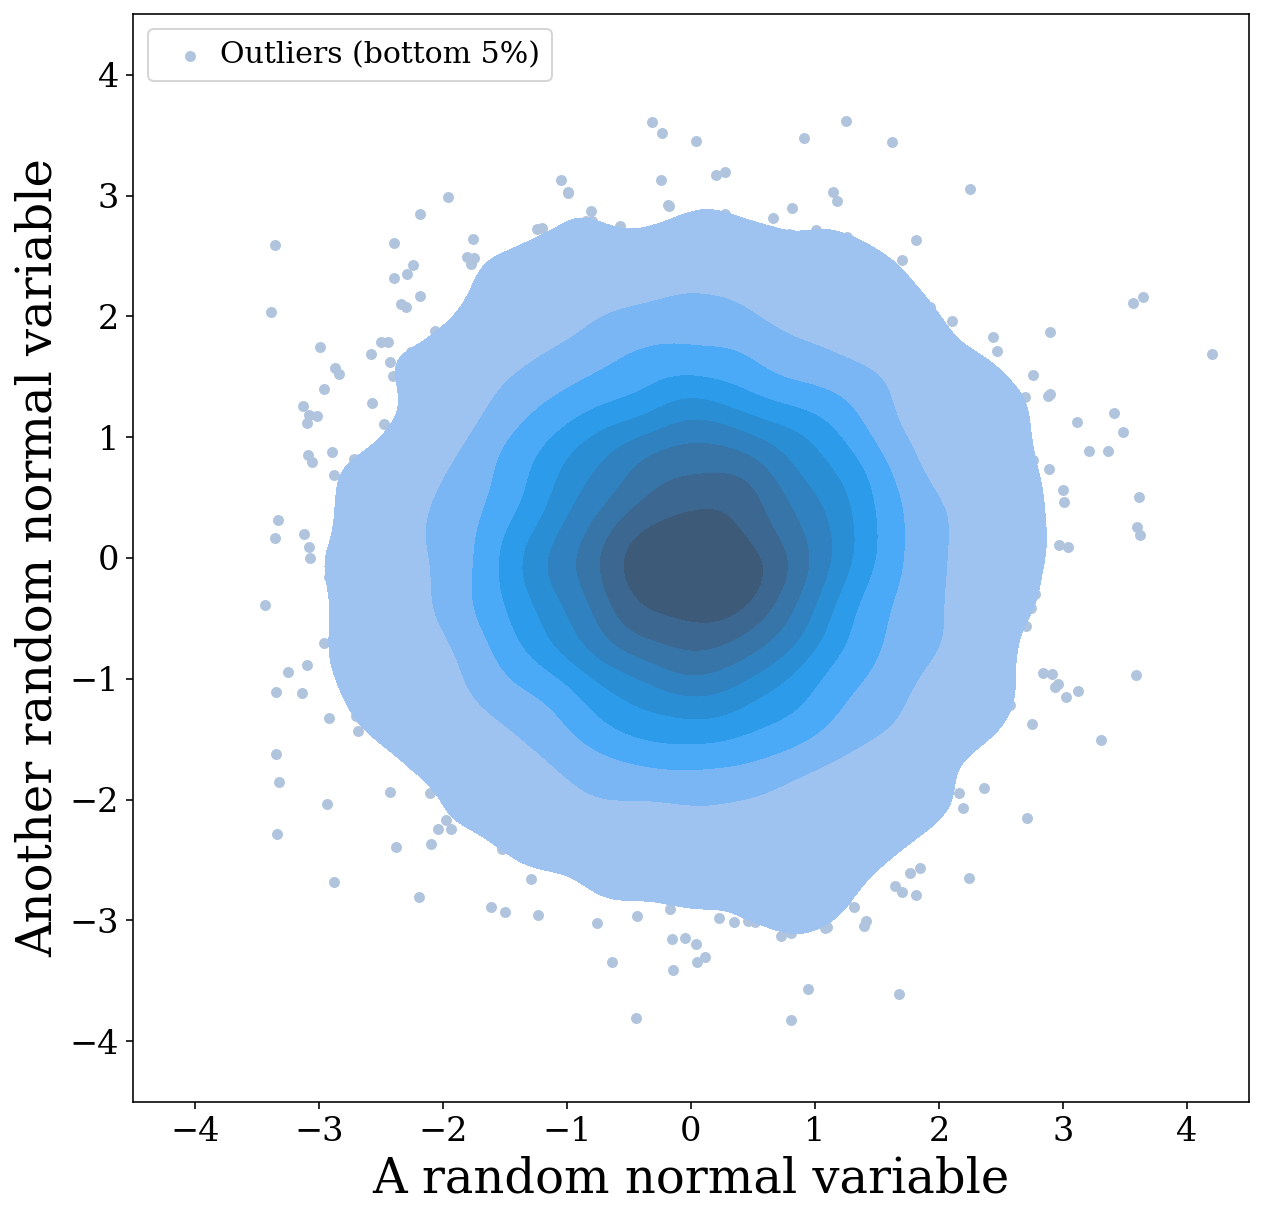

In [14]:
# create a square figure
fig, ax = plt.subplots(figsize=(10, 10))

fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, show=False, label="Outliers (bottom 5%)", color="lightsteelblue")
fig, ax = vis.plot_2D_dist(x, y, fig=fig, ax=ax, disttype="kde", fill=True, xlim=(-4.5, 4.5), ylim=(-4.5, 4.5),
                           show=False, xlabel="A random normal variable", ylabel="Another random normal variable")

# add legend with information on outliers
ax.legend(loc="upper left", handletextpad=0.0, fontsize=15)
plt.show()

### Plotting distributions directly from the Source class

You may be thinking that all of those various options are rather a lot of work and perhaps you'd rather just immediately see the distribution of interesting source parameters. Have no fear, here is also a wrapper to help automatically plot and generate axis labels for plots of source parameters! For example, we can plot the chirp mass distribution like so:

In [15]:
# create a random collection of sources
n_values = 1000
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.uniform(0, 30, n_values) * u.kpc
f_orb = 10**(np.random.uniform(-5, -2, n_values)) * u.Hz
ecc = np.random.uniform(0.0, 0.2, n_values)
t_obs = 4 * u.yr

sources = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb)

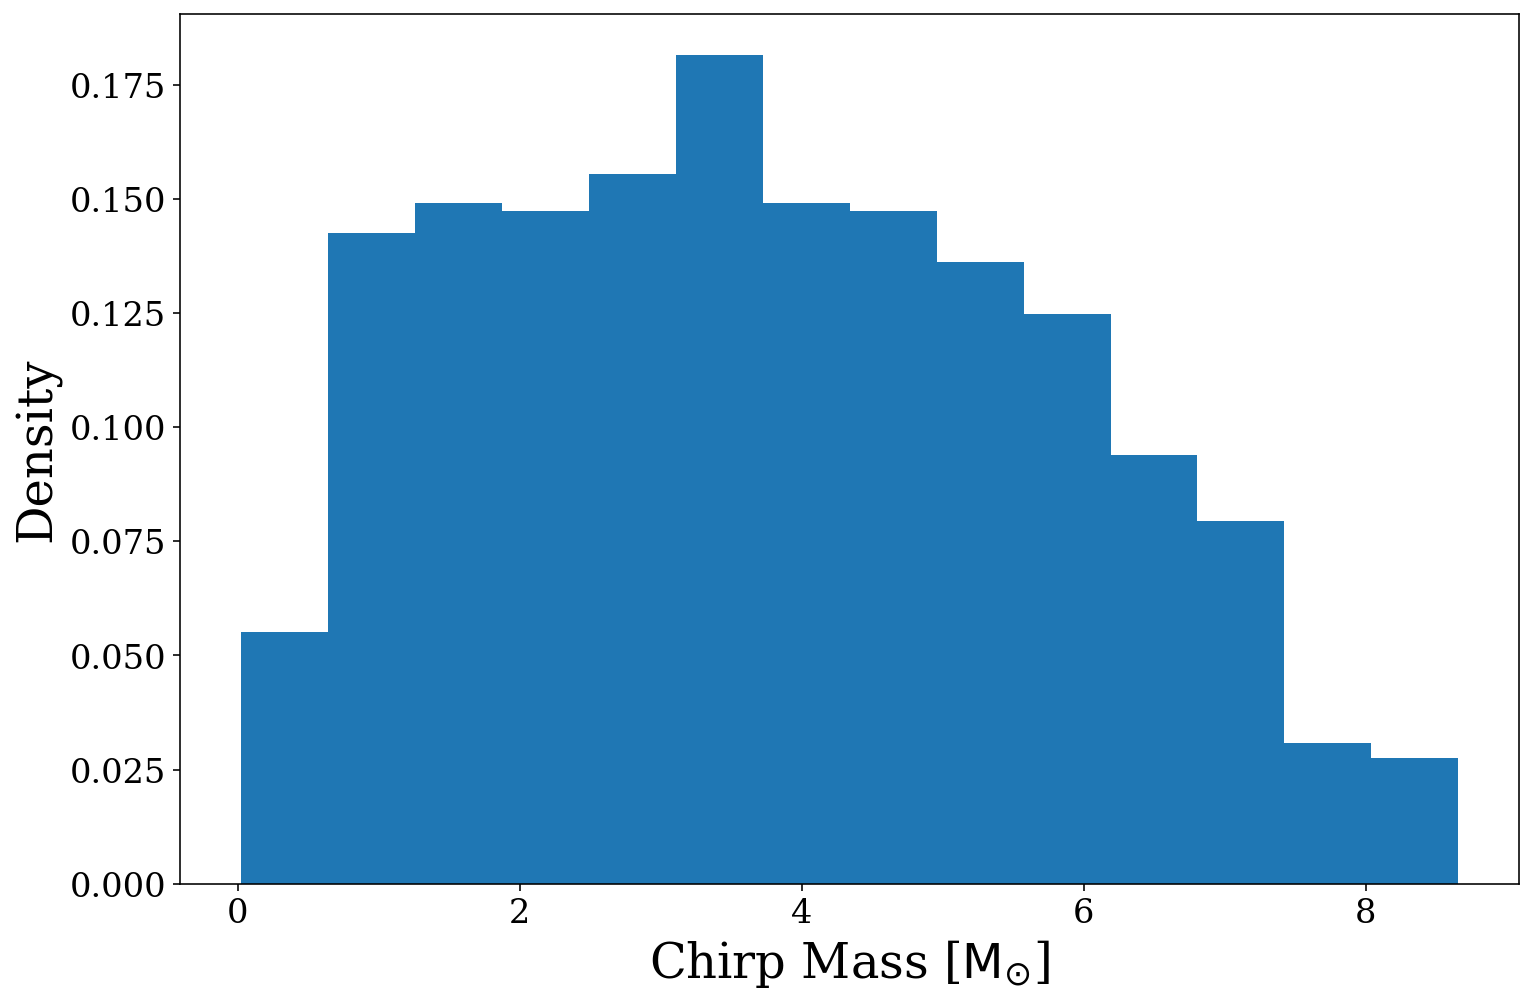

In [16]:
# create a histogram of the chirp mass
fig, ax = sources.plot_source_variables(xstr="m_c", ylabel="Density")

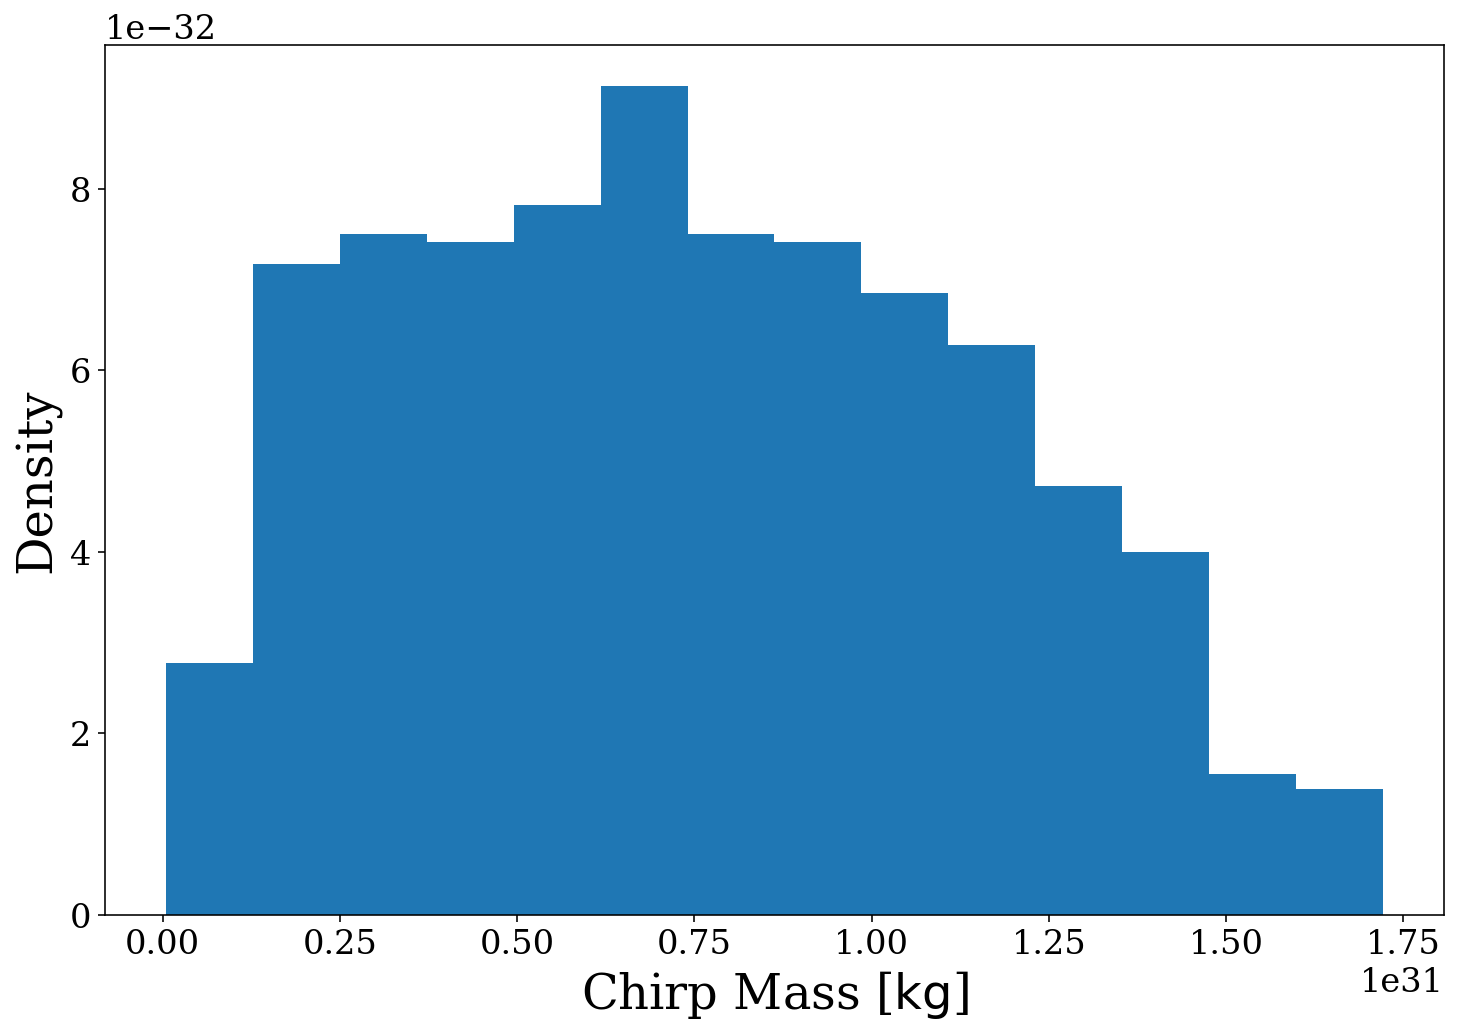

In [17]:
# convert chirp mass to kilograms using astropy.units
sources.m_c = sources.m_c.to(u.kg)

# plot the chirp mass using exactly the same code as before
fig, ax = sources.plot_source_variables(xstr="m_c", ylabel="Density")

You can also supply two variables and get a 2D distribution instead. Let's compare the orbital frequency and signal-to-noise ratio (which we need to compute first!)

In [18]:
# compute the SNR (verbosely so you can see what types of sources we have)
snr = sources.get_snr(verbose=True)

Calculating SNR for 1000 sources
	0 sources have already merged
	964 sources are stationary
		320 sources are stationary and circular
		644 sources are stationary and eccentric
	36 sources are evolving
		13 sources are evolving and circular
		23 sources are evolving and eccentric


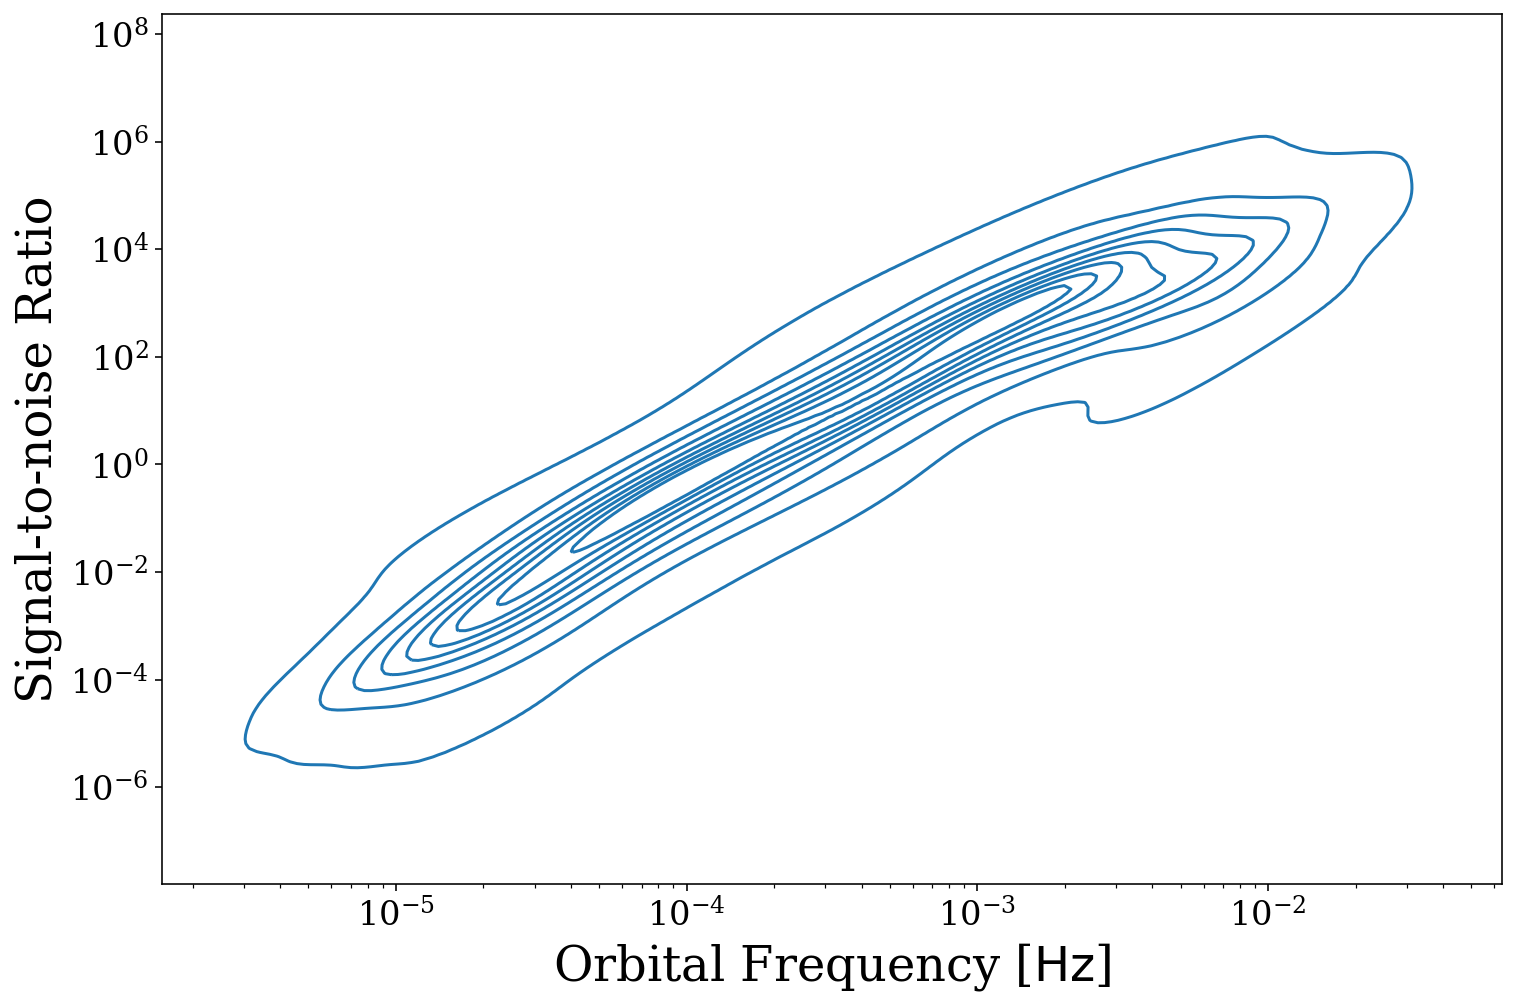

In [19]:
fig, ax = sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True))

### Weighted Samples

What if you prefer one source over the other?? ``LEGWORK`` handles this too! Just set the `weights` in the source and they'll be used in all histograms and KDEs and scatter plots will have different point sizes

In [20]:
weights = np.random.uniform(0, 10, n_values)
sources.weights = weights

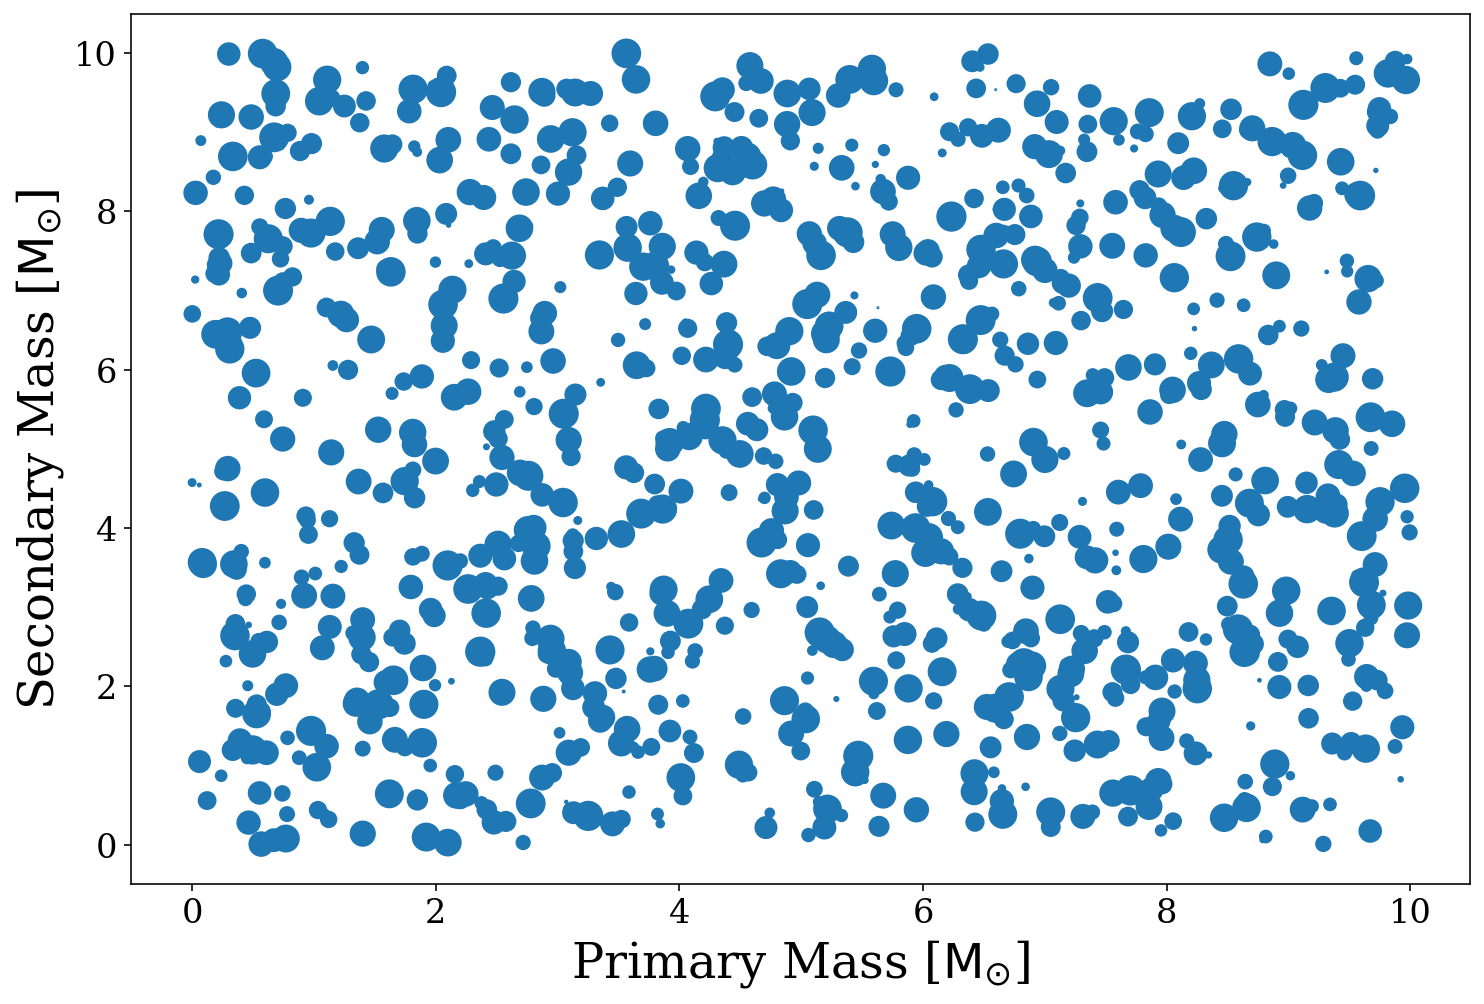

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:xlabel='Primary Mass [$\\mathrm{M_{\\odot}}$]', ylabel='Secondary Mass [$\\mathrm{M_{\\odot}}$]'>)

In [21]:
sources.plot_source_variables("m_1", "m_2")

## Plot sensitivity curves

### LISA curve

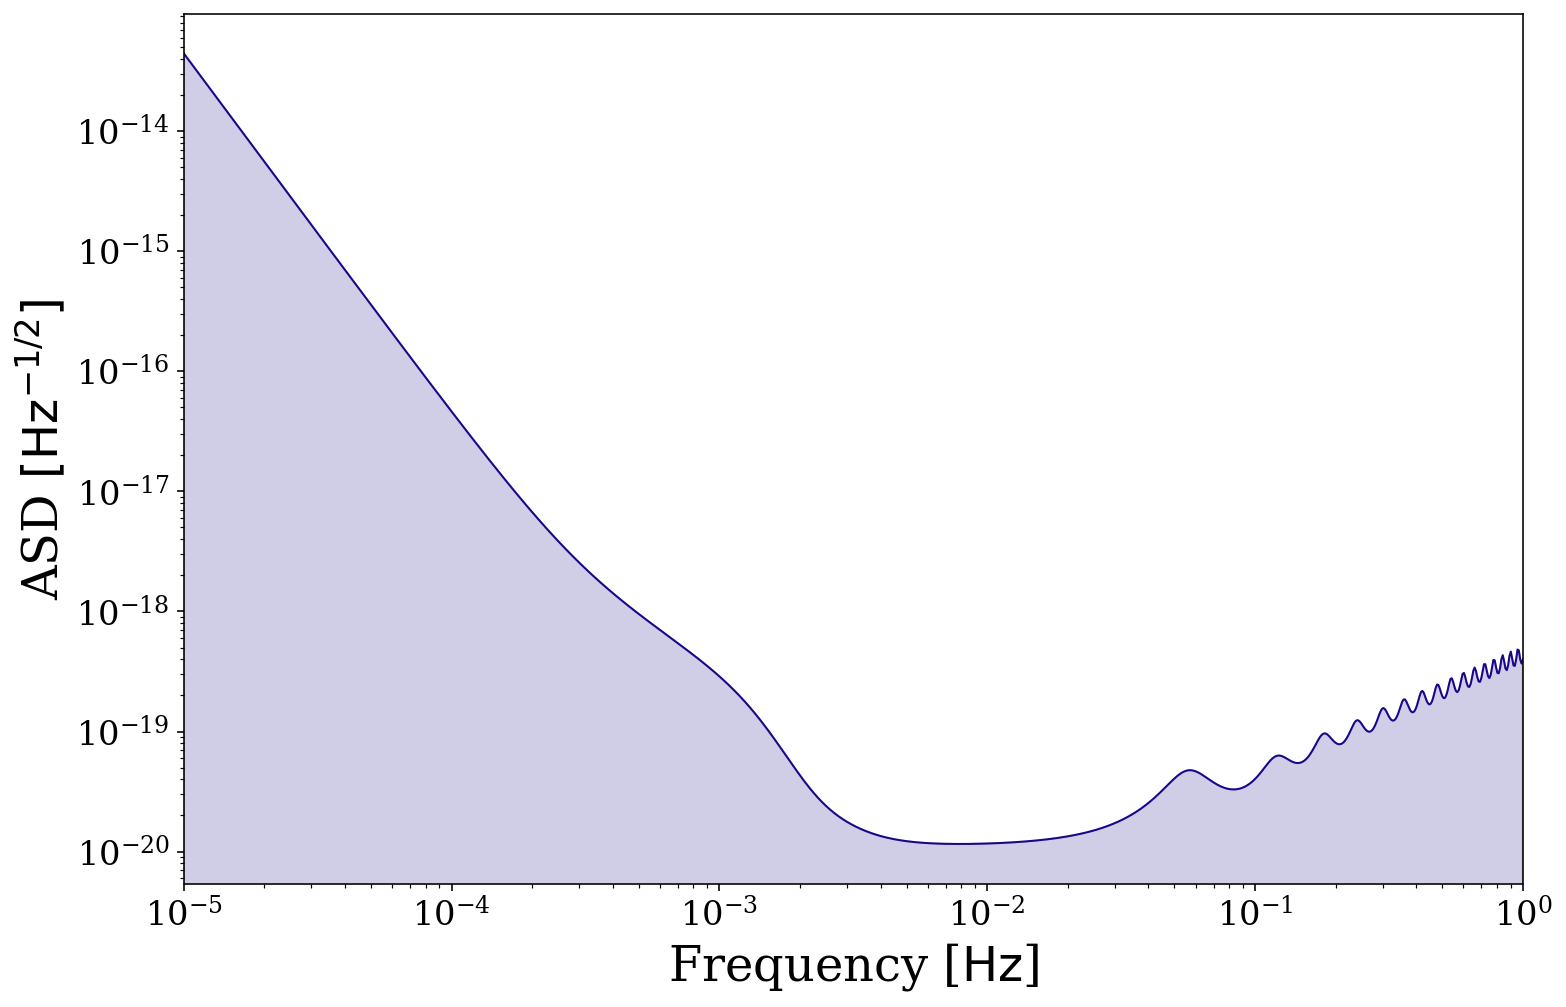

In [22]:
fig, ax = vis.plot_sensitivity_curve()

For the default sensitivity curve we plot the ASD, $\sqrt{S_{\rm n}(f)}$, but it is also possible to plot the characteristic strain, $\sqrt{f S_{\rm n}(f)}$, instead. As a demonstration, let's also adjust the frequency range to ignore low frequencies.

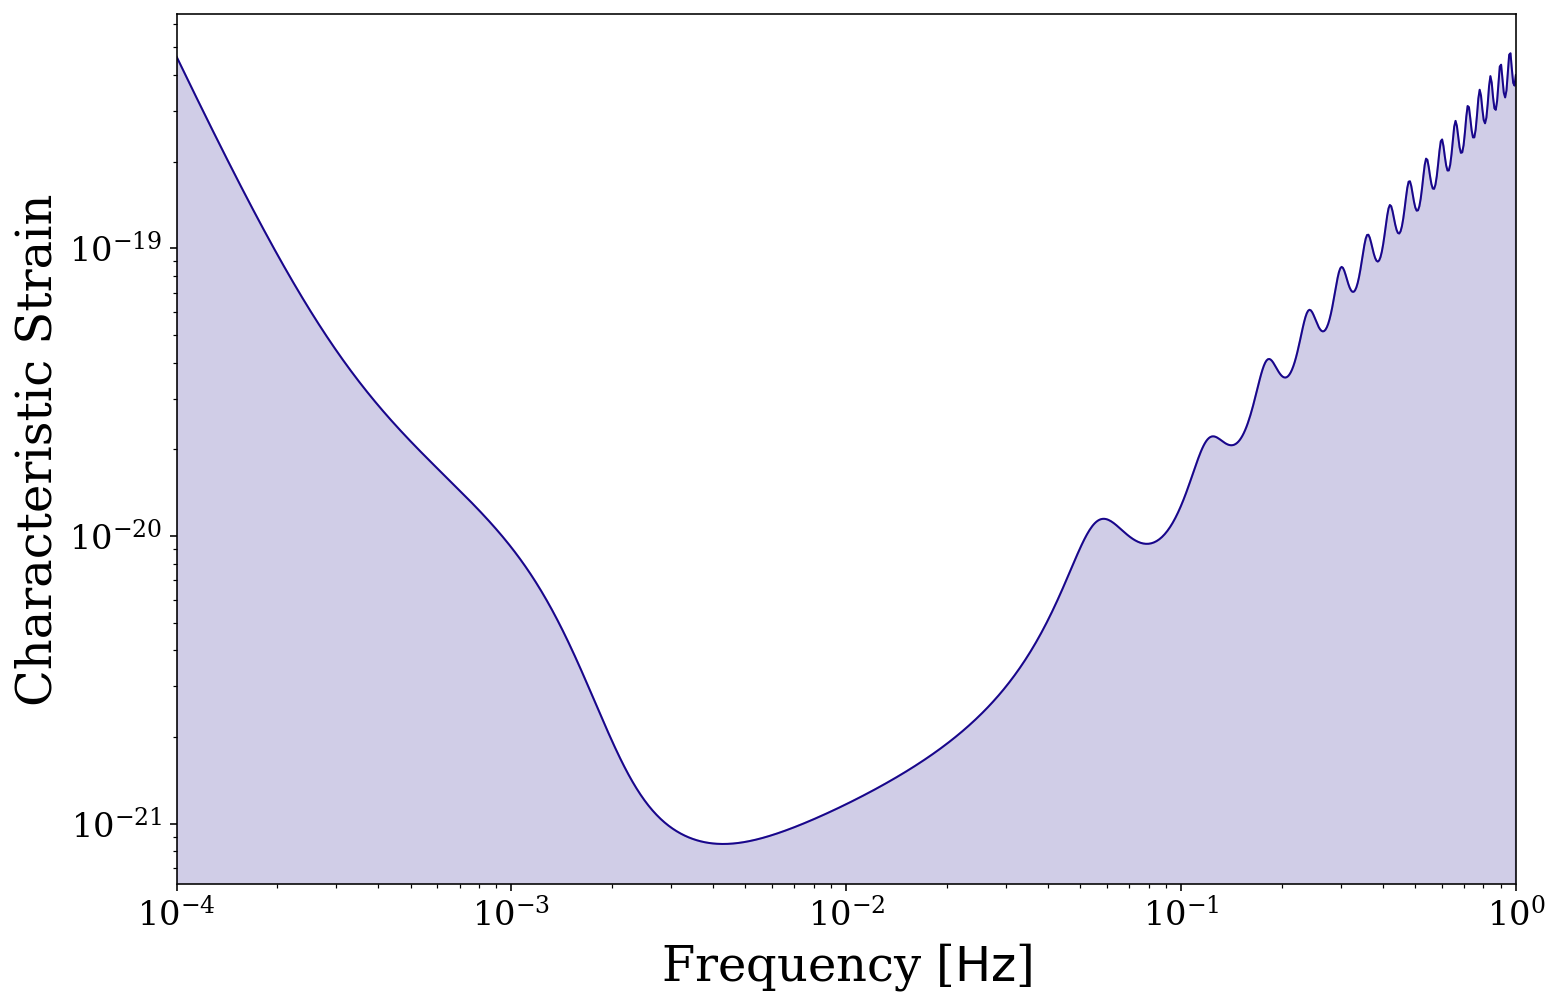

In [23]:
frequency_range = frequency_range=np.logspace(-4, 0, 1000) * u.Hz
fig, ax = vis.plot_sensitivity_curve(frequency_range, y_quantity="h_c")

It is also possible to adjust the sensitivity curve by changing the mission length, transfer function approximation and confusion noise. For this plot we set the `color=None` so that it picks default matplotlib colours and remove the fill for clarity.

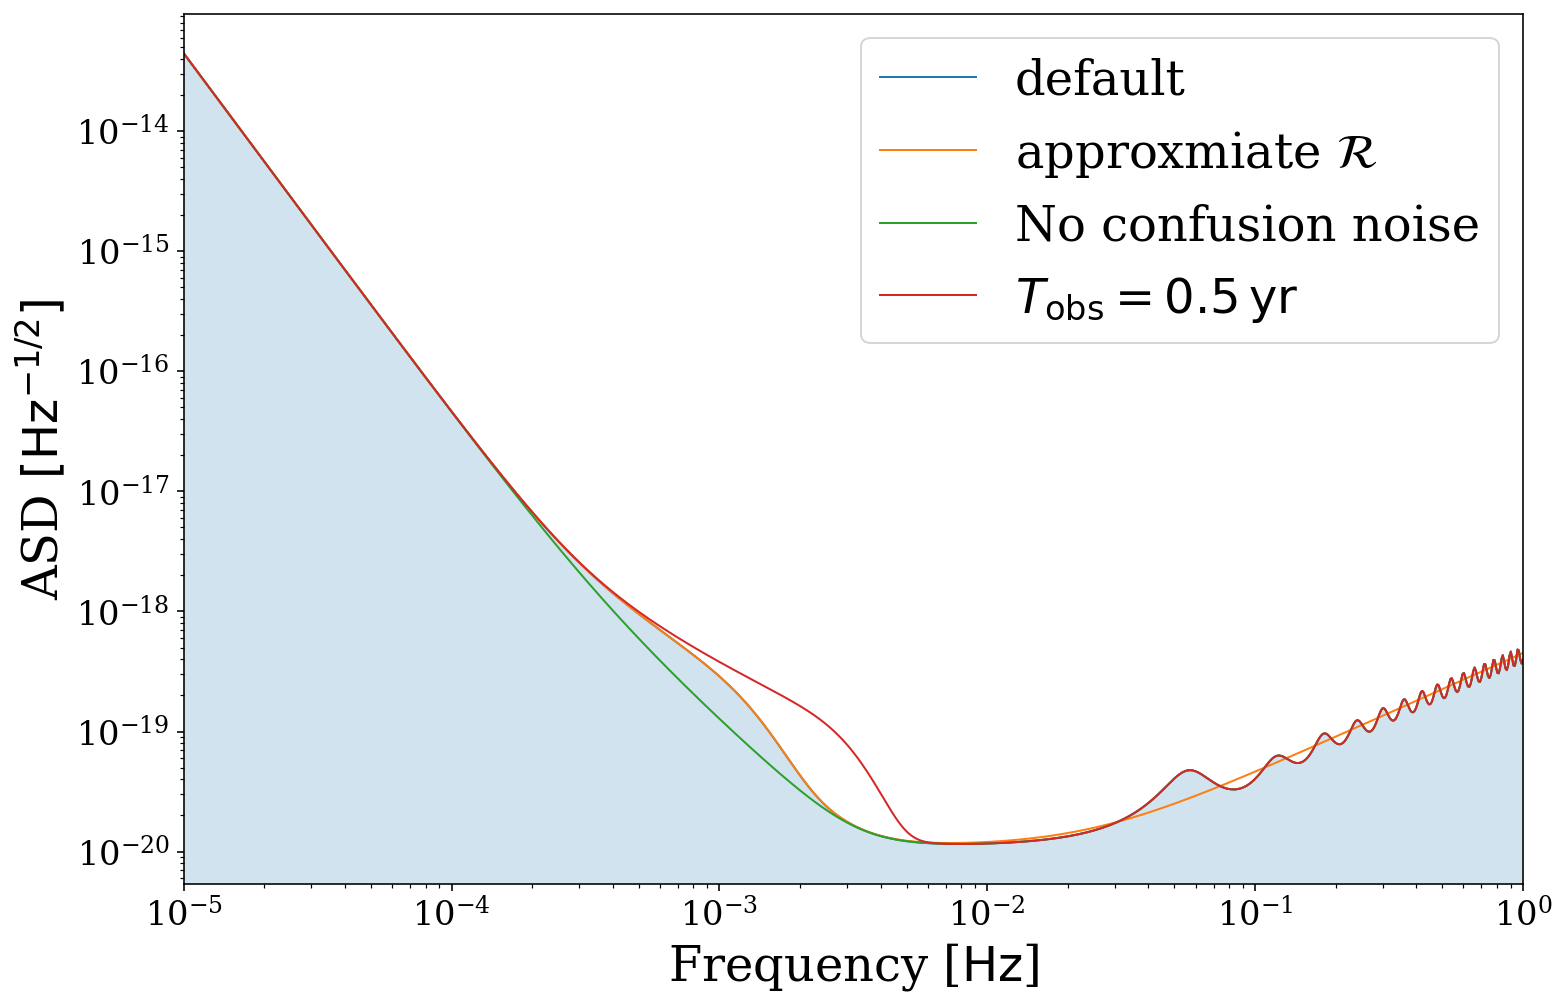

In [24]:
# default settings (keep fill for this one)
fig, ax = vis.plot_sensitivity_curve(label="default", fill=True, show=False, color=None)

# approximate the LISA transfer function
fig, ax = vis.plot_sensitivity_curve(approximate_R=True, color=None, label=r"approxmiate $\mathcal{R}$",
                                     fill=False, fig=fig, ax=ax, show=False)

# remove all confusion noise
fig, ax = vis.plot_sensitivity_curve(include_confusion_noise=False, color=None,label=r"No confusion noise",
                                     fill=False, fig=fig, ax=ax, show=False)

# shorten the mission length (increases confusion noise)
fig, ax = vis.plot_sensitivity_curve(t_obs=0.5 * u.yr, color=None, label=r"$T_{\rm obs} = 0.5 \,\rm{yr}$",
                                     fill=False, fig=fig, ax=ax, show=False)

ax.legend()

plt.show()

### Alternate instruments

We also support the use of other sensitivity curves. Currently we have implemented the TianQin curve by default but also allow custom curves.

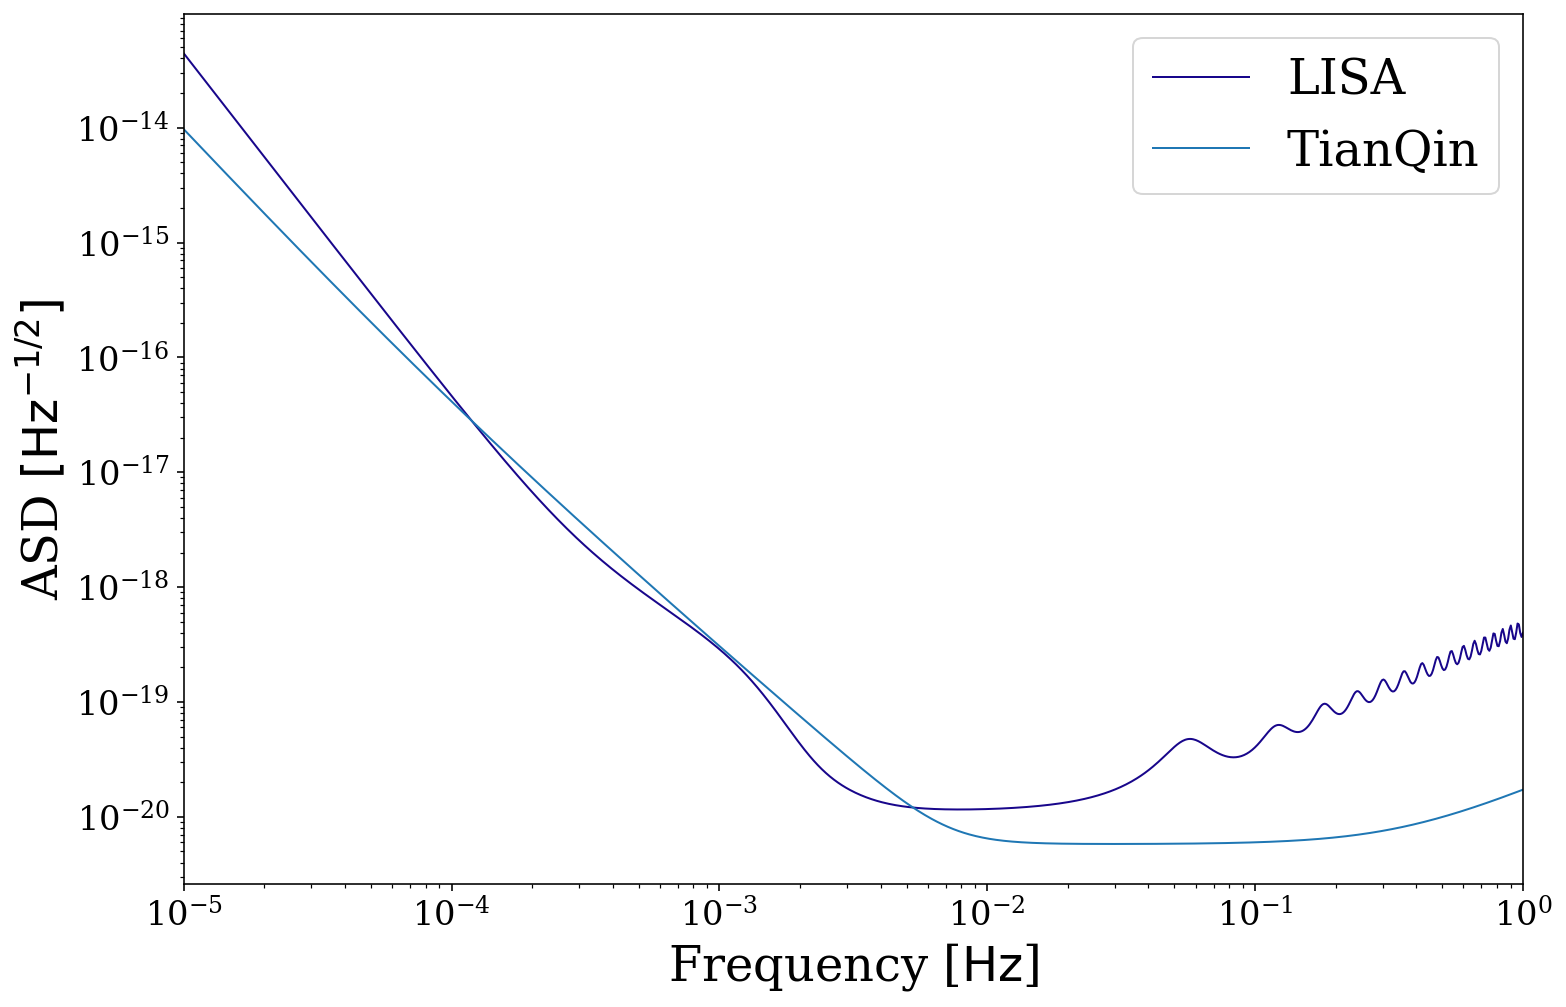

In [25]:
# compare LISA and TianQin
fig, ax = vis.plot_sensitivity_curve(show=False, fill=False, instrument="LISA", label="LISA")
fig, ax = vis.plot_sensitivity_curve(show=False, fill=False, instrument="TianQin", label="TianQin",
                                     color=None, fig=fig, ax=ax)
ax.legend()
plt.show()

Let's also compare LISA with some imaginary detector that is a factor different than LISA

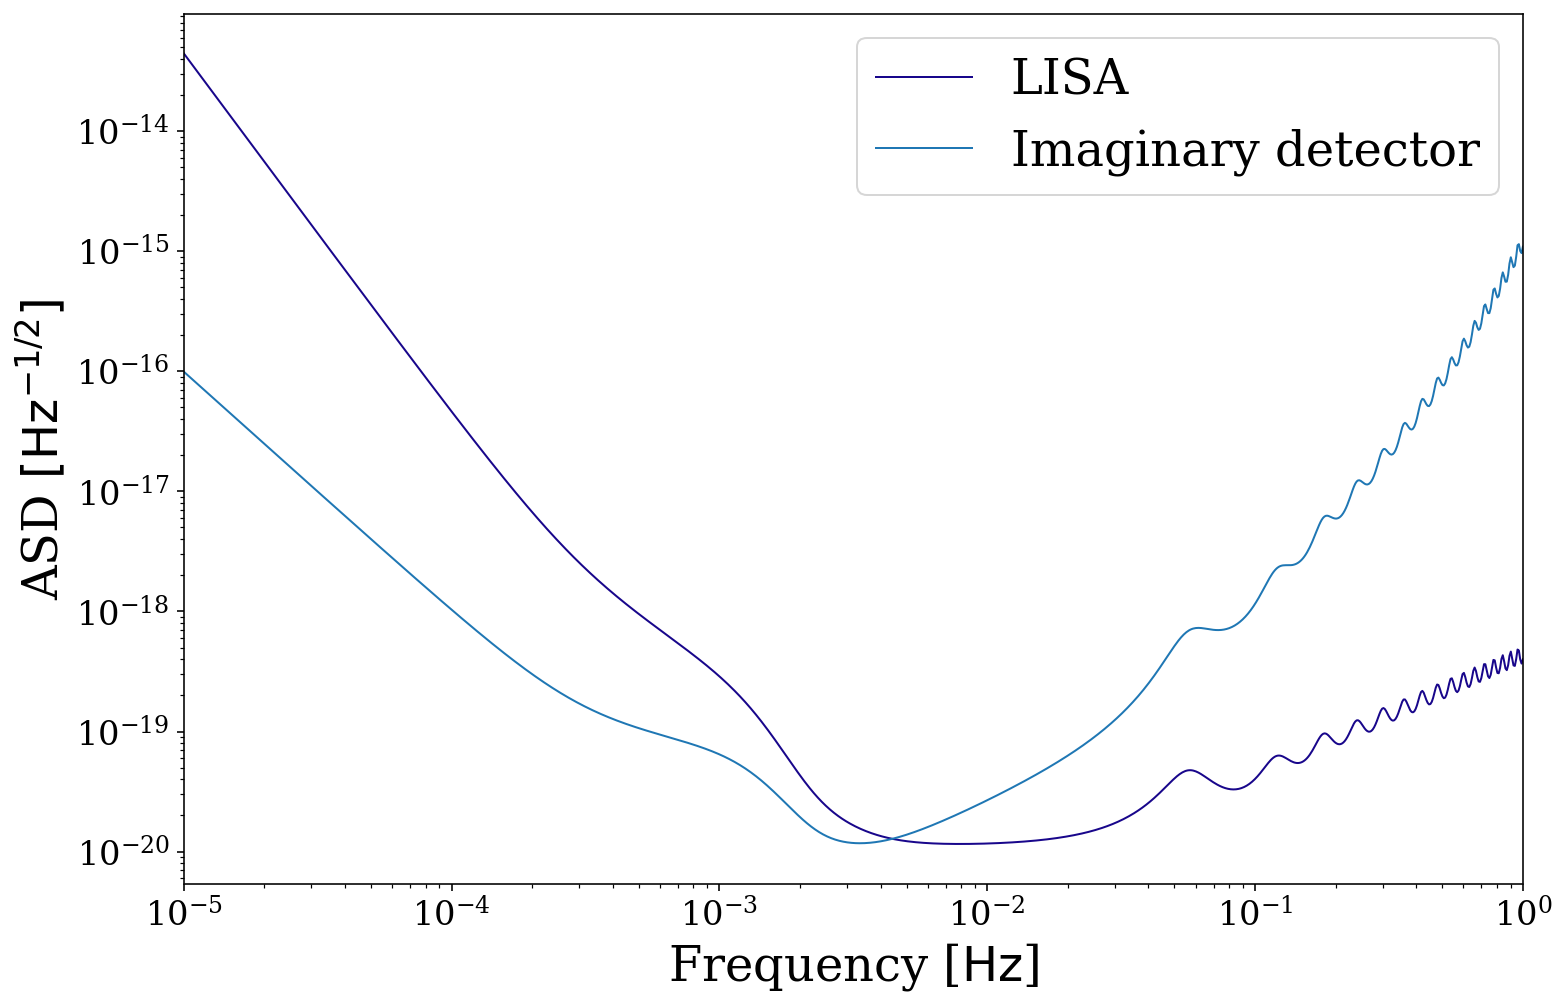

In [26]:
# compare LISA to an imaginary detector
fig, ax = vis.plot_sensitivity_curve(show=False, fill=False, instrument="LISA", label="LISA")

# note function signature must be the same as lisa_psd, despite some values being ignored
def imaginary_detector(f, t_obs, L, approximate_R, include_confusion_noise):
    return 5e4 * f**2 * np.exp(5 * f.value) * psd.lisa_psd(f=f)

fig, ax = vis.plot_sensitivity_curve(show=False, fill=False, instrument="custom",
                                     custom_psd=imaginary_detector, label="Imaginary detector",
                                     color=None, fig=fig, ax=ax, L=5e9)
ax.legend()
plt.show()

## Plot sources on the sensitivity curve

Finally, we can combine everything we've done so far in this tutorial in order to plot distributions of binaries on the sensitivity curve.

### Circular and Stationary Binaries
Let's start by creating a collection of circular and stationary binaries and computing the SNR for each.

In [27]:
n_values = 500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.uniform(0, 30, n_values) * u.kpc
f_orb = 10**(np.random.uniform(-5, -3, n_values)) * u.Hz
ecc = np.repeat(0.0, n_values)
t_obs = 4 * u.yr
weights = np.random.uniform(0, 1, n_values)

sources = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb, weights=weights)

In [28]:
circ_stat_snr = sources.get_snr(verbose=True)

Calculating SNR for 500 sources
	0 sources have already merged
	500 sources are stationary
		500 sources are stationary and circular


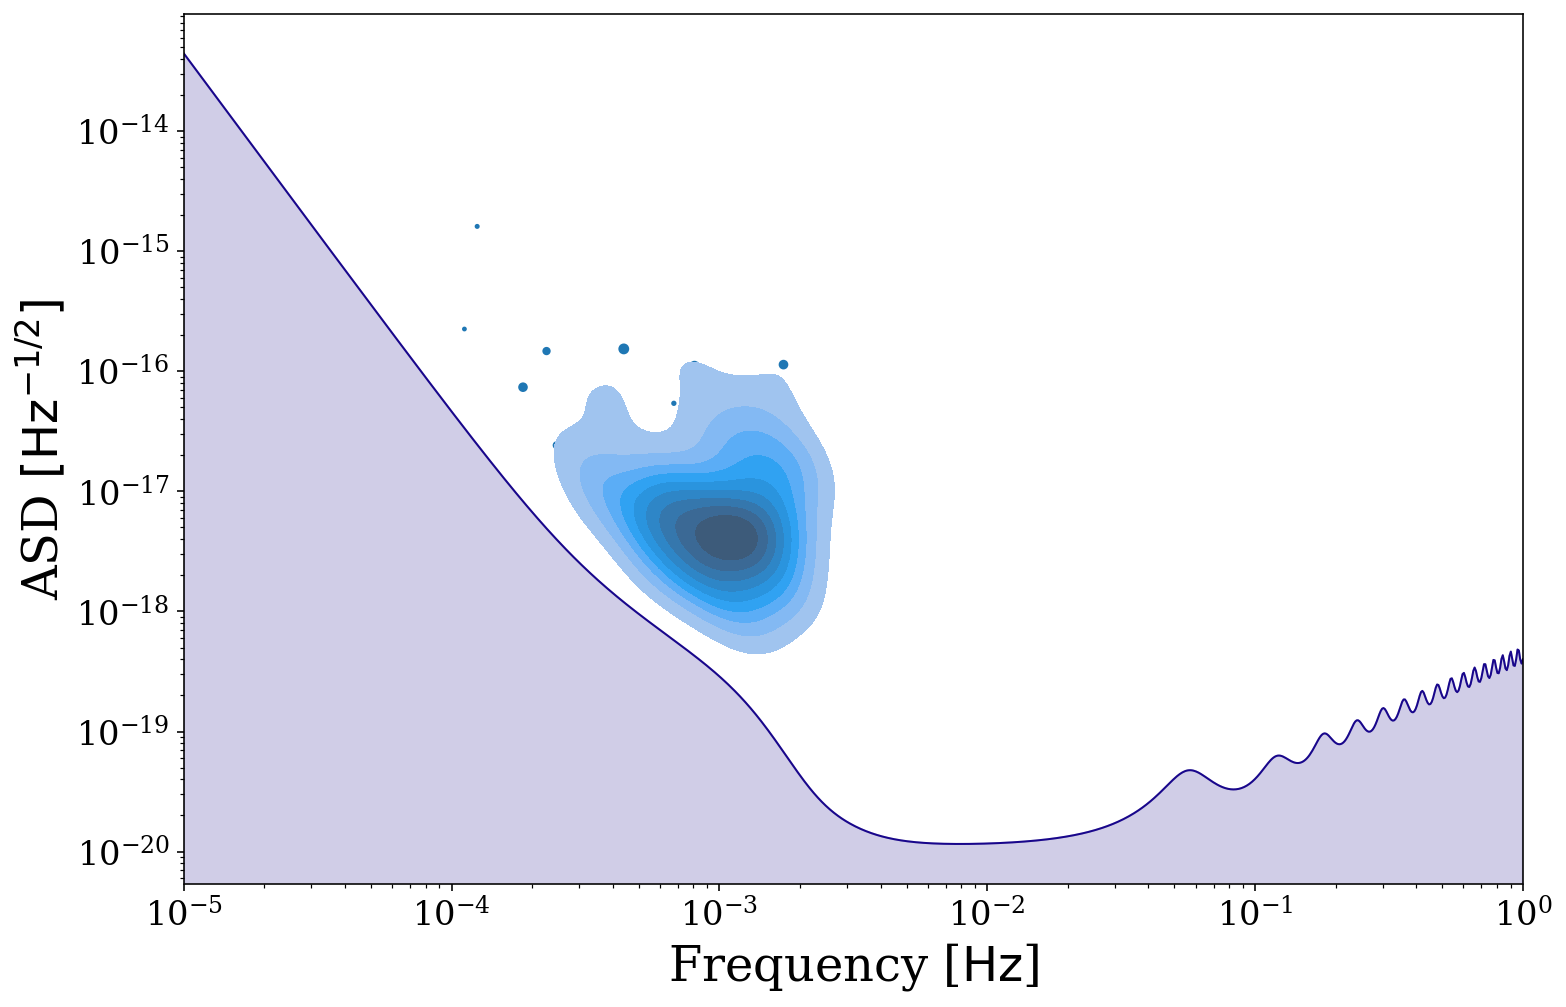

In [29]:
fig, ax = sources.plot_sources_on_sc(snr_cutoff=7, show=False)
fig, ax = sources.plot_sources_on_sc(snr_cutoff=7, disttype="kde", thresh=0.1, fill=True, fig=fig, ax=ax)

But we may not want to know about only the *detectable* population, why don't we also plot the undetectable binaries. Additionally here we use a colormap to show the SNR of each binary and this map diverges at SNR = 1. Try changing the value of `cutoff` to see how the plot changes.

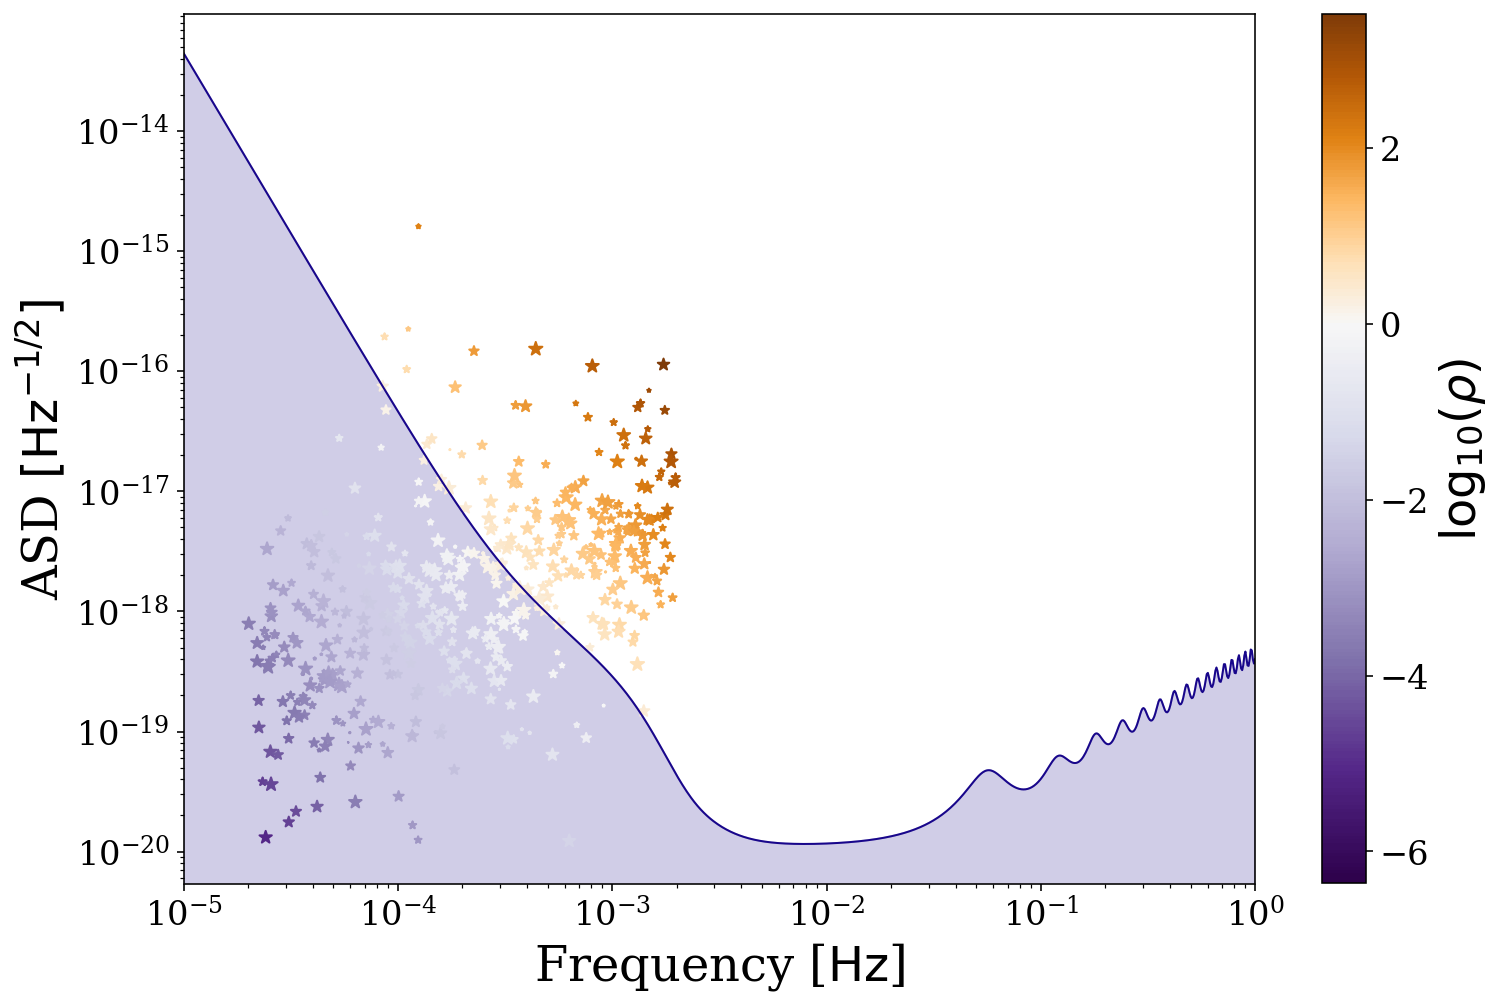

In [30]:
# define the detectable parameters
cutoff = 0
detectable_snr = sources.snr[sources.snr > cutoff]
norm = TwoSlopeNorm(vmin=np.log10(np.min(detectable_snr)),
                    vcenter=0, vmax=np.log10(np.max(detectable_snr)))

fig, ax = sources.plot_sources_on_sc(snr_cutoff=cutoff, marker="*", cmap="PuOr_r",
                                     c=np.log10(detectable_snr), show=False, norm=norm, scatter_s=50)

# create a colorbar from the scatter points
cbar = fig.colorbar(ax.collections[1])
cbar.ax.set_ylabel(r"$\log_{10} (\rho)$")

plt.show()

It could also be interesting to see how other parameters are affecting your distribution. Here is the same plot but with only the detectable binaries and coloured by their distance, as well as with a smaller x range. You should hopefully see that the more distant binaries are at higher frequencies and comparatively lower ASDs.

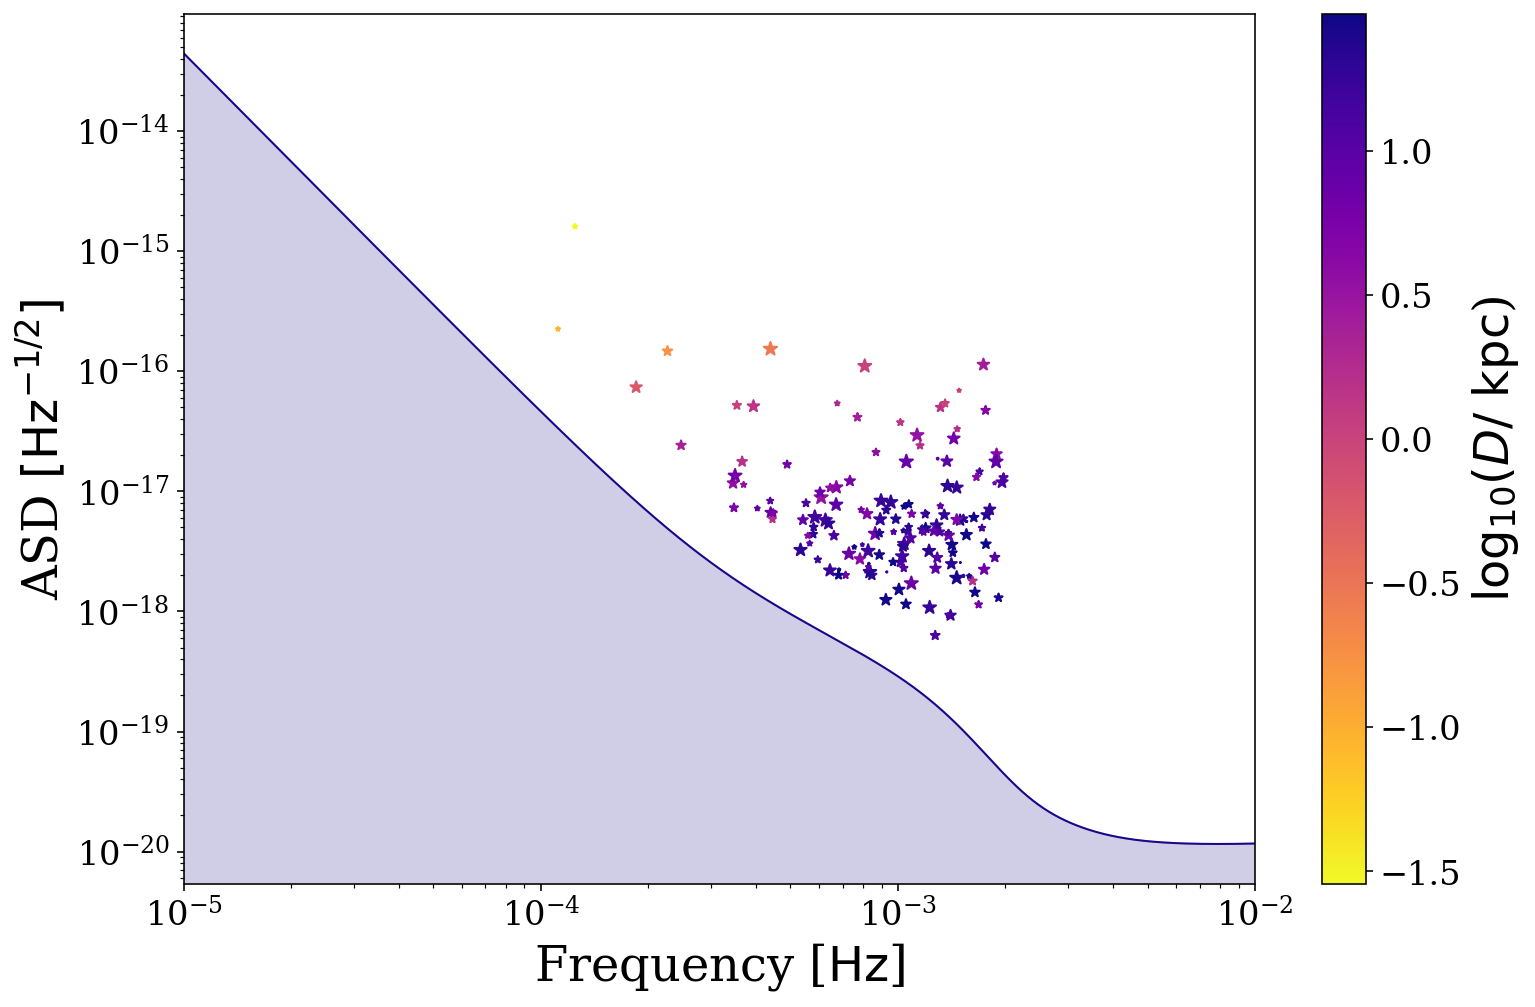

In [31]:
# define the detectable parameters
cutoff = 7
detectable_dist = sources.dist[sources.snr > cutoff].value

# plot the detectable binaries
fig, ax = sources.plot_sources_on_sc(snr_cutoff=cutoff, marker="*", cmap="plasma_r",
                                     c=np.log10(detectable_dist),
                                     show=False, xlim=(1e-5, 1e-2), scatter_s=50)
# create a colorbar from the scatter points
cbar = fig.colorbar(ax.collections[1])
cbar.ax.set_ylabel(r"{}{:latex})".format("$\log_{{{10}}} (D /$ ", sources.dist.unit))

plt.show()

### Eccentric and Stationary Binaries

These binaries work in much the same way as circular and stationary binaries. However, now the gravitational wave signal is spread over many harmonics. Therefore the harmonic with the maximum strain or snr may no longer be the $n=2$ harmonic as with circular binaries. This is best shown in an example.

Let's take a collection of eccentric and stationary sources and show how eccentricity affects the max strain harmonic.

In [38]:
n_values = 500
m_1 = np.random.uniform(0, 10, n_values) * u.Msun
m_2 = np.random.uniform(0, 10, n_values) * u.Msun
dist = np.random.uniform(0, 30, n_values) * u.kpc
f_orb = 10**(np.random.uniform(-5, -3, n_values)) * u.Hz
ecc = np.random.uniform(0.35, 0.4, n_values)
t_obs = 4 * u.yr

In [39]:
sources = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb)
ecc_stat_snr = sources.get_snr(verbose=True)

Calculating SNR for 500 sources
	0 sources have already merged
	500 sources are stationary
		500 sources are stationary and eccentric


This source Class contains a function that returns the maximum strain harmonic for any given eccentricity.

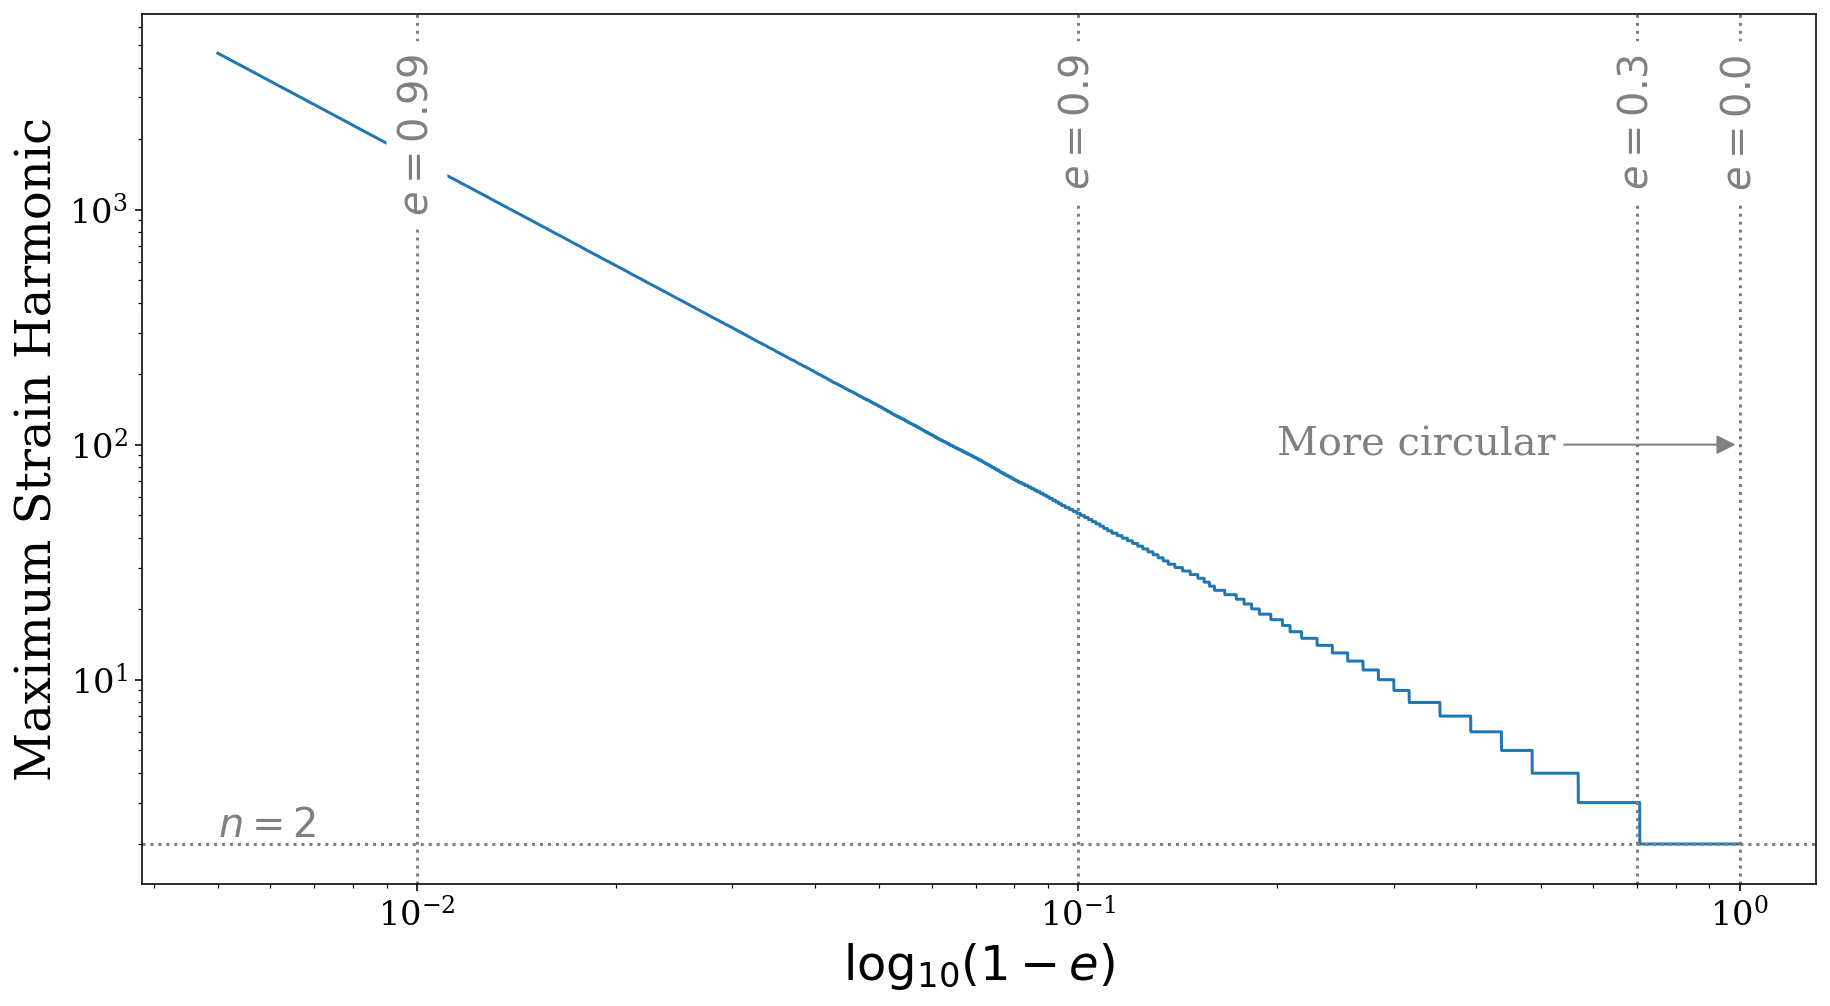

In [40]:
e_range = np.linspace(0, 0.995, 10000)
msh = sources.max_strain_harmonic(e_range)

fig = plt.figure(figsize=(15, 8))

plt.loglog(1 - e_range, msh)

plt.axhline(2, linestyle="dotted", color="grey")
plt.annotate(r"$n = 2$", xy=(5e-3, 2), va="bottom", fontsize=20, color="grey")

for e, l in [(0, r"$e=0.0$"), (0.3, r"$e=0.3$"), (0.9, r"$e=0.9$"), (0.99, r"$e=0.99$")]:
    plt.axvline(1 - e, linestyle="dotted", color="grey")
    plt.annotate(l, xy=(1 - e, np.max(msh)), rotation=90, ha="center", va="top",
                 fontsize=20, color="grey", bbox=dict(boxstyle="round", fc="white", ec="none"))

plt.annotate("More circular", xy=(1, 1e2), xytext=(2e-1, 1e2), fontsize=20, va="center", color="grey",
             arrowprops=dict(arrowstyle="-|>", fc="grey", ec="grey"))

plt.xlabel(r"$\log_{10}(1 - e)$")
plt.ylabel("Maximum Strain Harmonic")

plt.show()

As you can see in the plot above, once the eccentricity is greater than approximately $e = 0.3$, the maximum strain harmonic increases from $n = 2$ to $n = 3$ and this continues as eccentricity increases.

Although it is interesting to see this function, more directly applicable is the maximum *SNR* harmonic. This is useful because we should plot the binary at this harmonic instead of the $n=2$. This harmonic is calculated for each binary automatically when the SNR is calculated and stored in ``self.max_snr_harmonic``.

So now we can plot eccentric binaries on the sensitivity curve at their maximum snr harmonic, such that their height above the sensitivity curve is equal to their total SNR over all harmonics.

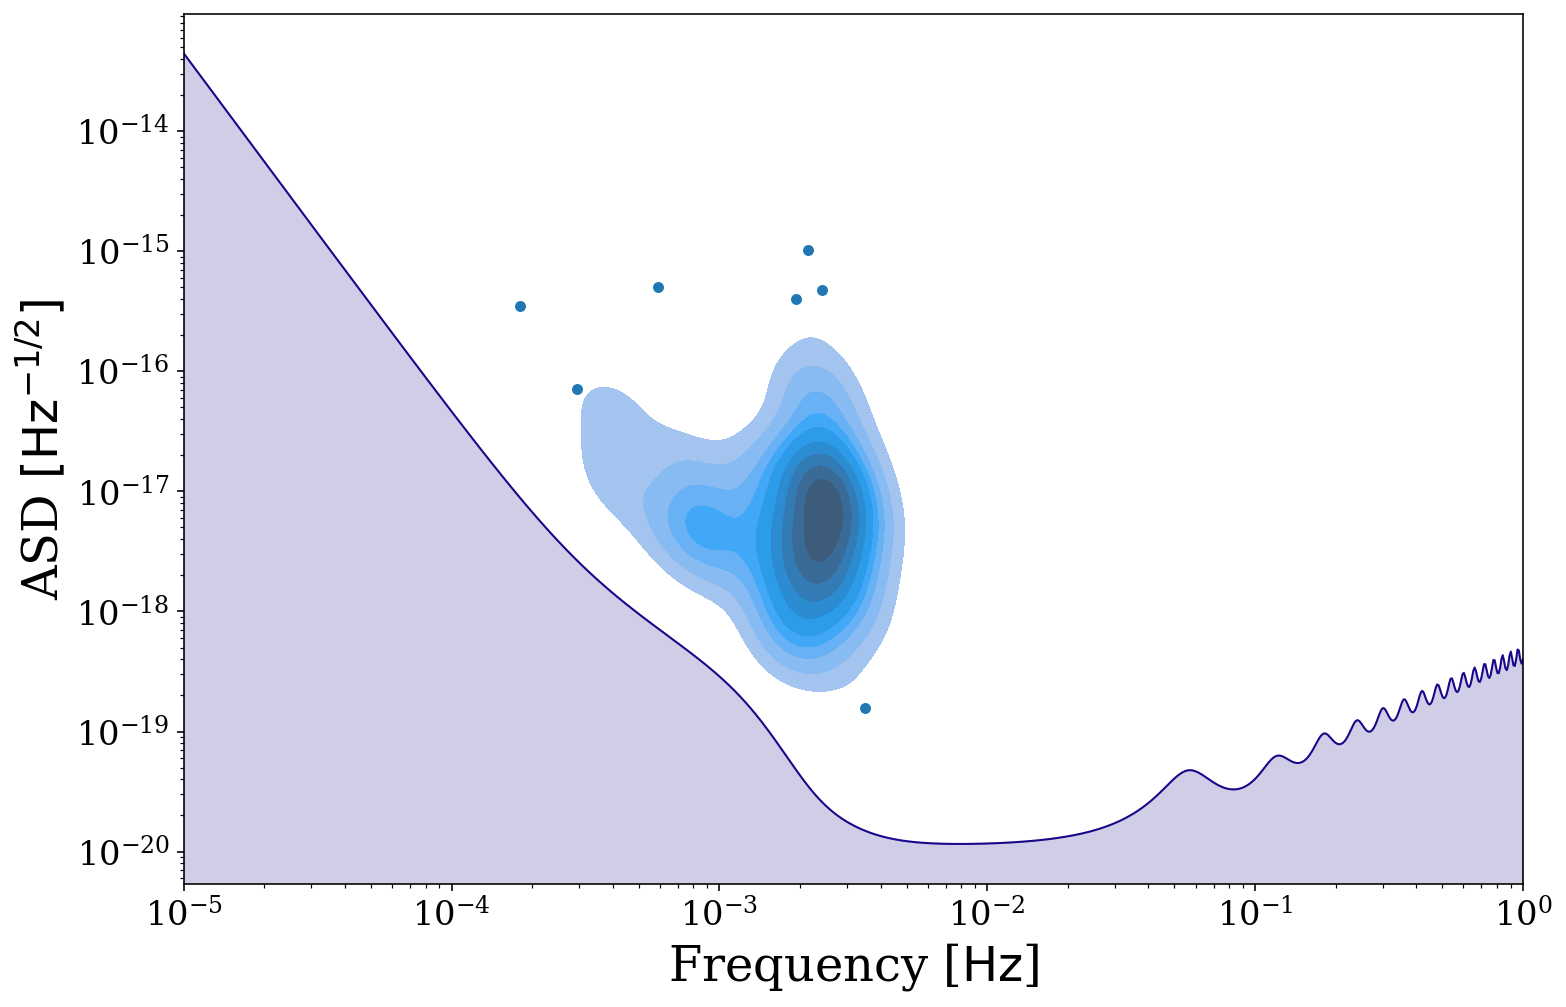

In [41]:
fig, ax = sources.plot_sources_on_sc(snr_cutoff=7, show=False)
fig, ax = sources.plot_sources_on_sc(snr_cutoff=7, disttype="kde", thresh=0.1, fill=True,
                                     fig=fig, ax=ax)

We could also repeat this for a different detector like this

In [42]:
# note that we can the interpolate parameters to TianQin defaults
sources_tq = source.Source(m_1, m_2, ecc, dist, f_orb=f_orb,
                           sc_params={"instrument": "TianQin", "L": np.sqrt(3) * 1e5 * u.km})
ecc_stat_snr_tq = sources_tq.get_snr(instrument="TianQin", verbose=True)

Calculating SNR for 500 sources
	0 sources have already merged
	500 sources are stationary
		500 sources are stationary and eccentric


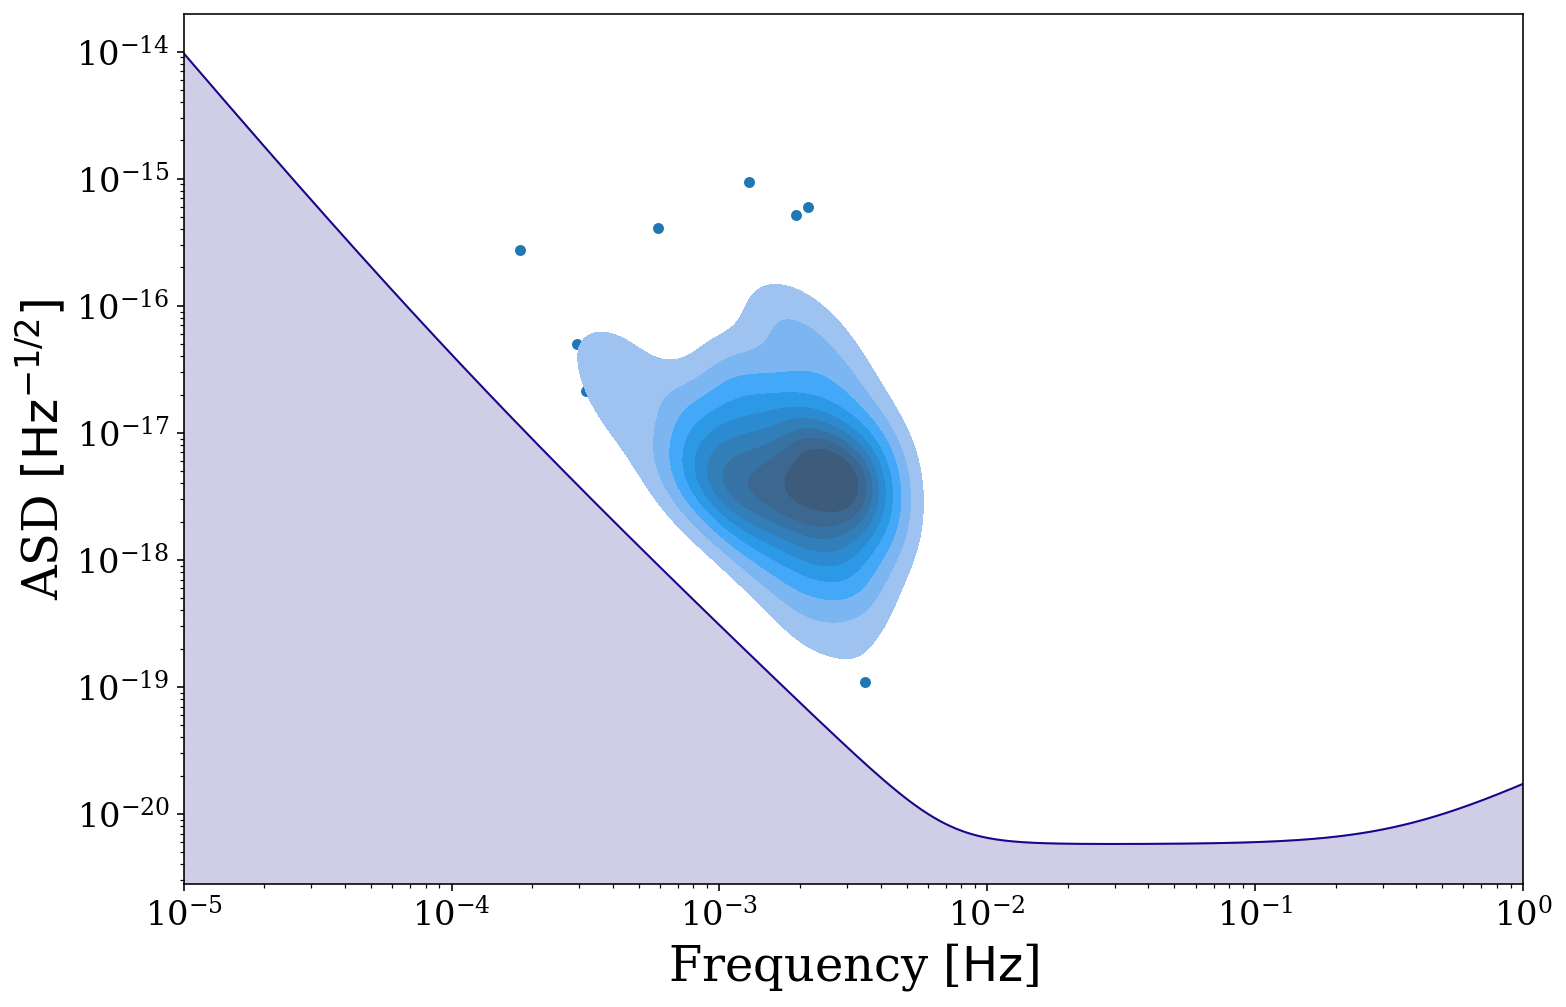

In [43]:
fig, ax = sources_tq.plot_sources_on_sc(snr_cutoff=7, show=False)
fig, ax = sources_tq.plot_sources_on_sc(snr_cutoff=7, disttype="kde", thresh=0.1, fill=True,
                                        fig=fig, ax=ax, show=False)

This concludes our tutorial for learning about the visualisation module of ``LEGWORK``, be sure to check out [our other tutorials](../tutorials.rst) to learn more about the exciting features that ``LEGWORK`` has to offer.